<a href="https://colab.research.google.com/github/AalexisYU/AalexisYU.github.io/blob/master/Part2/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing NEOWISE Data Subsets

Before any analysis can begin, we must first import all of our package,s and our three data .csv files:

In [37]:
# Begin with importing necessary packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import csv

# Set the config as described in Homework 4
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('fivethirtyeight')

print("Packages should have now been imported, and config loaded.")

Packages should have now been imported, and config loaded.


## 7.1 Creating The Workspace by Importing Data and Printing Headers, Descriptions, etc.

In [2]:
# Import the data, first mount the drive.
drive.mount("/content/drive")

# Use pandas to read the csv files, in my case there are 3 csv files.
df_cbe=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cbe.csv')
df_pms=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pms.csv')
df_either=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/either.csv')

# Print out the headers, data descirptions, etc.
# Data Dimensionality
print(f'cbe.csv dimensionality: ' + str(df_cbe.shape))

# Sample Size
print(f'Sample Size: ' + str(len(df_cbe)))
print(len(df_cbe))

# Column Count
column_count = sum(1 for row in df_cbe)
print(f'There are ' + str(column_count) + ' columns in this data set.')

# Data Description
print('\n\nData Description:')
print(df_cbe.describe())

# Statistics Data Desc.
print('\n\nData Description with statistics:')
print(df_cbe.describe().T)

# Header
print("\n\ncbe.csv Header")
df_cbe.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cbe.csv dimensionality: (693, 18)
Sample Size: 693
693
There are 18 columns in this data set.


Data Description:
             Full       GaiaDR2  RA_ICRS\ndeg  DE_ICRS\ndeg        pPMS  \
count  693.000000  6.930000e+02    693.000000    693.000000  693.000000   
mean   347.000000  2.321845e+18    188.099660     30.907309    0.167248   
std    200.196154  1.636407e+18    126.179134     36.461363    0.067306   
min      1.000000  1.811762e+17      0.079799    -64.343861    0.000000   
25%    174.000000  5.187646e+17     75.864778     14.845943    0.120000   
50%    347.000000  2.058443e+18    155.582722     46.321937    0.156000   
75%    520.000000  3.133061e+18    317.645956     58.322941    0.206000   
max    693.000000  6.059621e+18    359.858733     67.447438    0.442000   

             pCBe      pOther   Gmag\nmag  Dist1\narcsec  Dist2\narcsec  \
count 

Full       GaiaDR2  RA_ICRS\ndeg  DE_ICRS\ndeg   pPMS   pCBe  pOther  \
0     1  4.293898e+17      0.079799     61.153646  0.160  0.676   0.164   
1     2  4.315929e+17      0.440035     63.466109  0.099  0.894   0.007   
2     3  4.299233e+17      0.757090     62.172281  0.224  0.507   0.270   
3     4  4.315871e+17      0.896137     63.496154  0.207  0.657   0.136   
4     5  4.321723e+17      1.219533     65.097215  0.154  0.722   0.123   

   Gmag\nmag               IVPHAS  Dist1\narcsec              AllWISE  \
0    14.2083  J000019.14+610913.1        0.10692  J000019.15+610913.1   
1    12.0215  J000145.61+632758.1        0.05627  J000145.60+632758.0   
2    14.3688  J000301.70+621020.3        0.05103  J000301.70+621020.2   
3    13.5251  J000335.07+632946.2        0.06546  J000335.06+632946.1   
4    13.2190  J000452.70+650550.0        0.02386  J000452.68+650549.9   

   Dist2\narcsec  HAeBe  GUMAP  FPN  FVar  _RA.icrs\ndeg  _DE.icrs\ndeg  
0        0.01666    NaN    NaN  NaN   NaN       0.079813      61.153650  
1        0.08225    NaN    NaN  NaN   NaN       0.440063      63.466112  
2        0.00716    NaN    NaN  NaN   NaN       0.757114      62.172284  
3        0.07869    NaN    NaN  NaN   NaN       0.896155      63.496155  
4        0.06387    NaN    NaN  NaN   NaN       1.219558      65.097219

In [3]:
# Print out the headers, data descirptions, etc.
# Data Dimensionality
print(f'cbe.csv dimensionality: ' + str(df_pms.shape))

# Sample Size
print(f'Sample Size: ' + str(len(df_pms)))
print(len(df_pms))

# Column Count
column_count = sum(1 for row in df_pms)
print(f'There are ' + str(column_count) + ' columns in this data set.')

# Data Description
print('\n\nData Description:')
print(df_pms.describe())

# Statistics Data Desc.
print('\n\nData Description with statistics:')
print(df_pms.describe().T)

# Header
print("\n\ncbe.csv Header")
df_pms.head()

cbe.csv dimensionality: (8470, 18)
Sample Size: 8470
8470
There are 18 columns in this data set.


Data Description:
              Full       GaiaDR2  RA_ICRS\ndeg  DE_ICRS\ndeg         pPMS  \
count  8470.000000  8.470000e+03   8470.000000   8470.000000  8470.000000   
mean   4235.500000  2.929447e+18    195.864472     17.161919     0.714602   
std    2445.222723  1.723513e+18    111.888894     40.040650     0.146359   
min       1.000000  1.561256e+17      0.003730    -65.577294     0.500000   
25%    2118.250000  2.017307e+18     94.332060    -12.228268     0.586000   
50%    4235.500000  2.207539e+18    175.370429     27.972666     0.693000   
75%    6352.750000  4.251800e+18    305.101895     52.237697     0.836000   
max    8470.000000  6.059704e+18    359.873922     67.763044     1.000000   

              pCBe       pOther    Gmag\nmag  Dist1\narcsec  Dist2\narcsec  \
count  8470.000000  8470.000000  8470.000000    8470.000000    8470.000000   
mean      0.017972     0.267430  

Full       GaiaDR2  RA_ICRS\ndeg  DE_ICRS\ndeg   pPMS   pCBe  pOther  \
0     1  4.316039e+17      0.003730     63.679090  0.581  0.012   0.407   
1     2  4.323448e+17      0.042681     66.348928  0.608  0.006   0.387   
2     3  4.293762e+17      0.290580     60.827484  0.507  0.012   0.481   
3     4  4.225948e+17      0.342285     57.633017  0.692  0.003   0.305   
4     5  4.317693e+17      0.386591     64.632829  0.545  0.033   0.422   

   Gmag\nmag               IVPHAS  Dist1\narcsec              AllWISE  \
0    16.3148  J000000.86+634044.7        0.31083  J000000.93+634044.6   
1    18.3717  J000010.25+662056.0        0.15655  J000010.24+662056.0   
2    15.4331  J000109.74+604939.0        0.11637  J000109.80+604938.9   
3    18.6501  J000122.14+573759.0        0.06739  J000122.13+573758.8   
4    17.7619  J000132.77+643758.3        0.12678  J000132.70+643758.6   

   Dist2\narcsec HAeBe GUMAP  FPN FVar  _RA.icrs\ndeg  _DE.icrs\ndeg  
0        0.26079   NaN   NaN  NaN  NaN       0.003763      63.679116  
1        0.16929   NaN   NaN  NaN  Var       0.042671      66.348940  
2        0.50071   NaN   NaN  NaN  Var       0.290570      60.827539  
3        0.03063   NaN   NaN   PN  NaN       0.342239      57.633024  
4        0.70042   NaN   NaN  NaN  NaN       0.386614      64.632831

In [4]:
# Print out the headers, data descirptions, etc.
# Data Dimensionality
print(f'cbe.csv dimensionality: ' + str(df_either.shape))

# Sample Size
print(f'Sample Size: ' + str(len(df_either)))
print(len(df_either))

# Column Count
column_count = sum(1 for row in df_either)
print(f'There are ' + str(column_count) + ' columns in this data set.')

# Data Description
print('\n\nData Description:')
print(df_either.describe())

# Statistics Data Desc.
print('\n\nData Description with statistics:')
print(df_either.describe().T)

# Header
print("\n\ncbe.csv Header")
df_either.head()

cbe.csv dimensionality: (1309, 18)
Sample Size: 1309
1309
There are 18 columns in this data set.


Data Description:
              Full       GaiaDR2  RA_ICRS\ndeg  DE_ICRS\ndeg         pPMS  \
count  1309.000000  1.309000e+03   1309.000000   1309.000000  1309.000000   
mean    655.000000  2.921716e+18    208.568646     17.337529     0.366653   
std     378.020061  1.782945e+18    112.447885     43.155418     0.127018   
min       1.000000  1.809074e+17      0.251661    -64.745941     0.028000   
25%     328.000000  2.013496e+18    100.236522    -19.258423     0.261000   
50%     655.000000  2.175140e+18    244.337300     33.367014     0.406000   
75%     982.000000  4.318202e+18    311.579033     54.942785     0.486000   
max    1309.000000  6.057847e+18    359.872632     67.232524     0.500000   

              pCBe       pOther    Gmag\nmag  Dist1\narcsec  Dist2\narcsec  \
count  1309.000000  1309.000000  1309.000000    1309.000000    1309.000000   
mean      0.212511     0.420826  

Full       GaiaDR2  RA_ICRS\ndeg  DE_ICRS\ndeg   pPMS   pCBe  pOther  \
0     1  4.293439e+17      0.251661     60.446008  0.256  0.383   0.361   
1     2  4.227615e+17      0.279462     58.551630  0.220  0.377   0.403   
2     3  4.295231e+17      0.441378     61.703913  0.278  0.227   0.495   
3     4  4.293731e+17      0.558653     60.695857  0.305  0.463   0.232   
4     5  4.316150e+17      0.711818     63.776024  0.284  0.298   0.418   

   Gmag\nmag               IVPHAS  Dist1\narcsec              AllWISE  \
0    13.2490  J000100.40+602645.7        0.11915  J000100.39+602645.5   
1    13.5685  J000107.05+583305.8        0.20709  J000107.05+583305.6   
2    13.1967  J000145.90+614214.1        0.35103  J000145.87+614213.8   
3    12.2970  J000214.09+604145.1        0.10912  J000214.03+604145.1   
4    15.6039  J000250.84+634633.7        0.02636  J000250.83+634633.5   

   Dist2\narcsec  HAeBe GUMAP  FPN  FVar  _RA.icrs\ndeg  _DE.icrs\ndeg  
0        0.10046    NaN   NaN  NaN   NaN       0.251658      60.446009  
1        0.21964    NaN   NaN  NaN   NaN       0.279276      58.551594  
2        0.19078    NaN   NaN  NaN   NaN       0.441058      61.703890  
3        0.32806    NaN   NaN  NaN   NaN       0.558666      60.695852  
4        0.14304    NaN   NaN  NaN   NaN       0.711838      63.776025

# 7.2 Data Cleaning

Since every row is inentionally missing data points, we can't simply use ".dropna()" like usual as if we were to use the dropna() function, there would be literally no data left at all.

Instead, I manually looked through each of the rows and determined that there is no missing data among the sets.

Should we wanted to use dropna(), then the result would look like this:

In [5]:
df_cbe_reduced = df_cbe#.drop([989, 990, 991])
df_cbe_reduced_nadrop = df_cbe_reduced#.dropna()
df_cbe_reduced_nadrop.describe()

Full       GaiaDR2  RA_ICRS\ndeg  DE_ICRS\ndeg        pPMS  \
count  693.000000  6.930000e+02    693.000000    693.000000  693.000000   
mean   347.000000  2.321845e+18    188.099660     30.907309    0.167248   
std    200.196154  1.636407e+18    126.179134     36.461363    0.067306   
min      1.000000  1.811762e+17      0.079799    -64.343861    0.000000   
25%    174.000000  5.187646e+17     75.864778     14.845943    0.120000   
50%    347.000000  2.058443e+18    155.582722     46.321937    0.156000   
75%    520.000000  3.133061e+18    317.645956     58.322941    0.206000   
max    693.000000  6.059621e+18    359.858733     67.447438    0.442000   

             pCBe      pOther   Gmag\nmag  Dist1\narcsec  Dist2\narcsec  \
count  693.000000  693.000000  693.000000     693.000000     693.000000   
mean     0.667864    0.164886   12.865701       0.082727       0.179983   
std      0.111443    0.097555    1.051277       0.084670       0.296661   
min      0.500000    0.001000    4.633200       0.000580       0.002030   
25%      0.575000    0.081000   12.413800       0.039060       0.047180   
50%      0.658000    0.156000   12.788000       0.066570       0.080480   
75%      0.753000    0.230000   13.306100       0.098770       0.160290   
max      0.971000    0.484000   19.963600       0.918520       1.927760   

       HAeBe  GUMAP  FVar  _RA.icrs\ndeg  _DE.icrs\ndeg  
count    0.0    0.0   0.0     693.000000     693.000000  
mean     NaN    NaN   NaN     188.099674      30.907315  
std      NaN    NaN   NaN     126.179141      36.461368  
min      NaN    NaN   NaN       0.079813     -64.343858  
25%      NaN    NaN   NaN      75.864777      14.845951  
50%      NaN    NaN   NaN     155.582768      46.321939  
75%      NaN    NaN   NaN     317.645974      58.322950  
max      NaN    NaN   NaN     359.858753      67.447436

for cbe.csv,

In [6]:
df_pms_reduced = df_pms#.drop([989, 990, 991])
df_pms_reduced_nadrop = df_pms_reduced#.dropna()
df_pms_reduced_nadrop.describe()

Full       GaiaDR2  RA_ICRS\ndeg  DE_ICRS\ndeg         pPMS  \
count  8470.000000  8.470000e+03   8470.000000   8470.000000  8470.000000   
mean   4235.500000  2.929447e+18    195.864472     17.161919     0.714602   
std    2445.222723  1.723513e+18    111.888894     40.040650     0.146359   
min       1.000000  1.561256e+17      0.003730    -65.577294     0.500000   
25%    2118.250000  2.017307e+18     94.332060    -12.228268     0.586000   
50%    4235.500000  2.207539e+18    175.370429     27.972666     0.693000   
75%    6352.750000  4.251800e+18    305.101895     52.237697     0.836000   
max    8470.000000  6.059704e+18    359.873922     67.763044     1.000000   

              pCBe       pOther    Gmag\nmag  Dist1\narcsec  Dist2\narcsec  \
count  8470.000000  8470.000000  8470.000000    8470.000000    8470.000000   
mean      0.017972     0.267430    16.781511       0.095206       0.273782   
std       0.031529     0.144321     1.865856       0.094219       0.362495   
min       0.000000     0.000000     7.687200       0.000100       0.001220   
25%       0.005000     0.146000    15.554350       0.042690       0.068257   
50%       0.009000     0.284000    16.981600       0.071840       0.129830   
75%       0.017000     0.394000    18.160625       0.114147       0.298890   
max       0.436000     0.498000    20.964100       0.999770       1.999930   

       _RA.icrs\ndeg  _DE.icrs\ndeg  
count    8470.000000    8470.000000  
mean      195.864483      17.161927  
std       111.888896      40.040655  
min         0.003763     -65.577288  
25%        94.332061     -12.228269  
50%       175.370485      27.972685  
75%       305.101899      52.237701  
max       359.873897      67.763054

for pms.csv, and

In [7]:
df_either_reduced = df_either#.drop([989, 990, 991])
df_either_reduced_nadrop = df_either_reduced#.dropna()
df_either_reduced_nadrop.describe()

Full       GaiaDR2  RA_ICRS\ndeg  DE_ICRS\ndeg         pPMS  \
count  1309.000000  1.309000e+03   1309.000000   1309.000000  1309.000000   
mean    655.000000  2.921716e+18    208.568646     17.337529     0.366653   
std     378.020061  1.782945e+18    112.447885     43.155418     0.127018   
min       1.000000  1.809074e+17      0.251661    -64.745941     0.028000   
25%     328.000000  2.013496e+18    100.236522    -19.258423     0.261000   
50%     655.000000  2.175140e+18    244.337300     33.367014     0.406000   
75%     982.000000  4.318202e+18    311.579033     54.942785     0.486000   
max    1309.000000  6.057847e+18    359.872632     67.232524     0.500000   

              pCBe       pOther    Gmag\nmag  Dist1\narcsec  Dist2\narcsec  \
count  1309.000000  1309.000000  1309.000000    1309.000000    1309.000000   
mean      0.212511     0.420826    14.773019       0.090701       0.299145   
std       0.168610     0.085094     2.280165       0.087736       0.409555   
min       0.003000     0.061000     6.994900       0.002820       0.002590   
25%       0.038000     0.382000    13.100200       0.040710       0.062700   
50%       0.190000     0.453000    14.104600       0.069820       0.127690   
75%       0.376000     0.488000    16.123700       0.108910       0.321860   
max       0.500000     0.500000    20.814300       0.998980       1.990550   

       HAeBe  FVar  _RA.icrs\ndeg  _DE.icrs\ndeg  
count    0.0   0.0    1309.000000    1309.000000  
mean     NaN   NaN     208.568661      17.337535  
std      NaN   NaN     112.447888      43.155424  
min      NaN   NaN       0.251658     -64.745937  
25%      NaN   NaN     100.236523     -19.258434  
50%      NaN   NaN     244.337303      33.367036  
75%      NaN   NaN     311.579062      54.942782  
max      NaN   NaN     359.872550      67.232521

for either.csv

# Appendix B - Figures - Figure 1

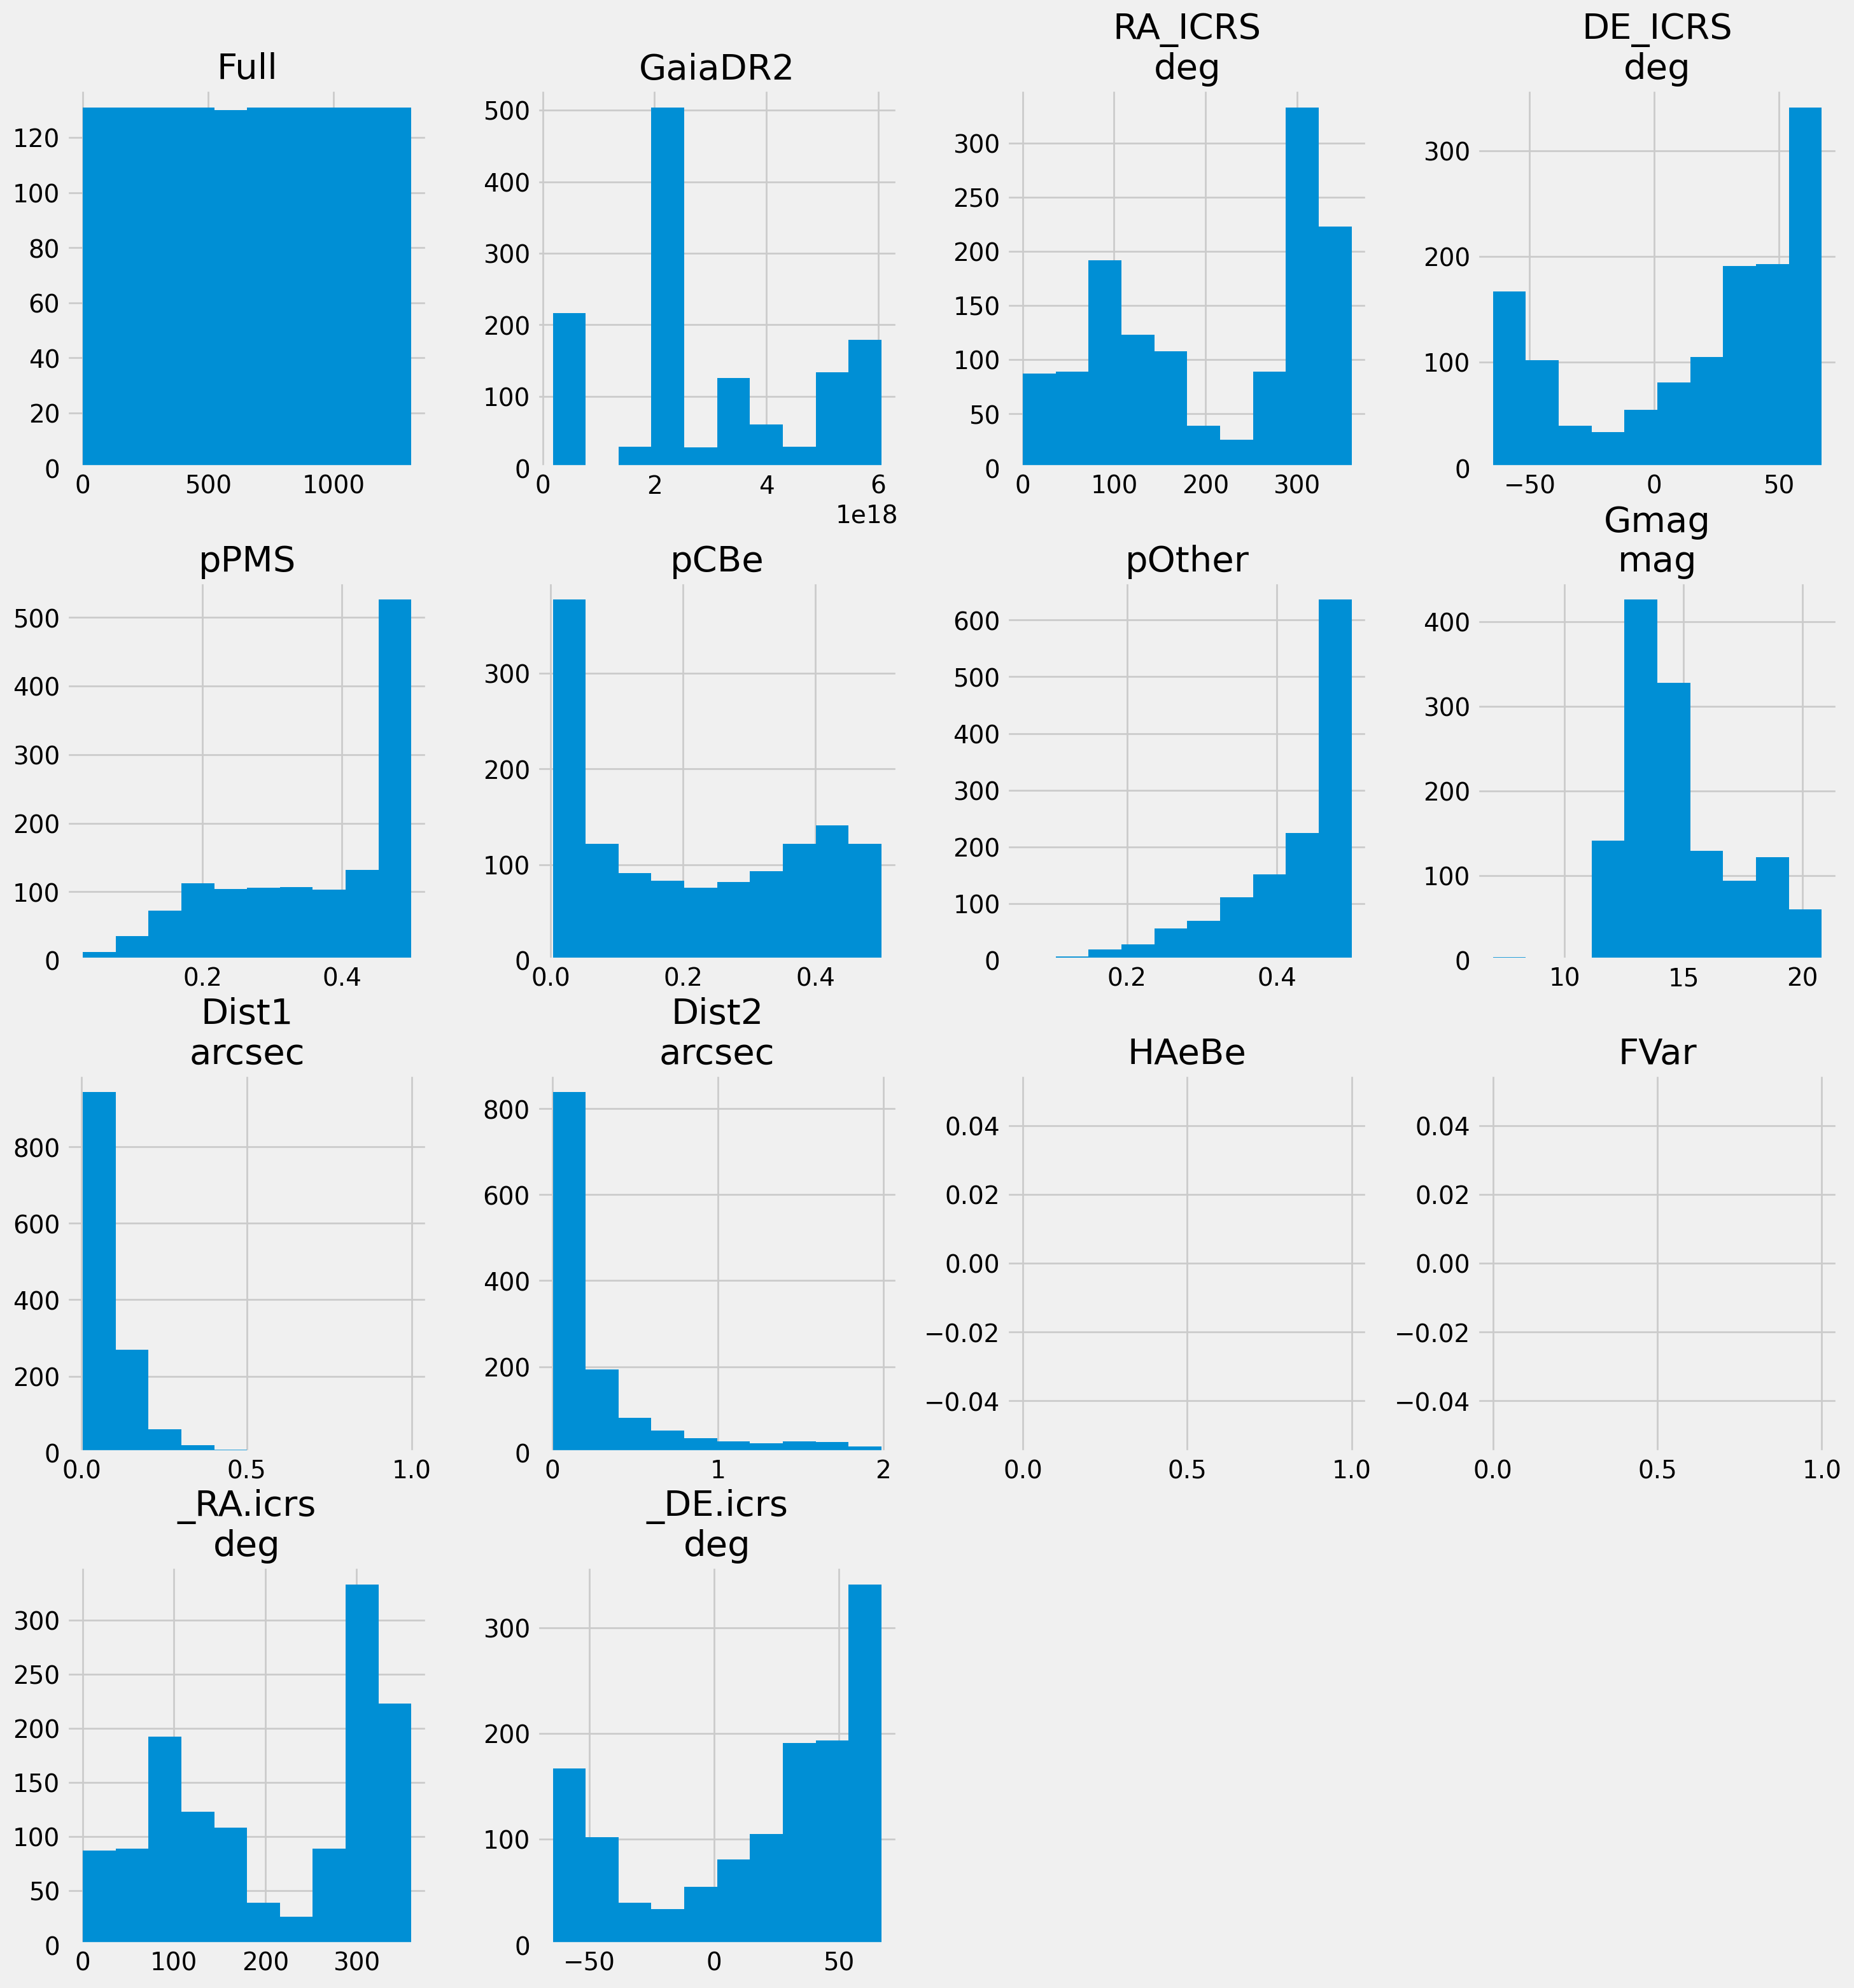

In [35]:
df_either_reduced_nadrop.hist(figsize = (16,18))
plt.ylabel('Counts')
plt.show()

Same, but for cbe.csv

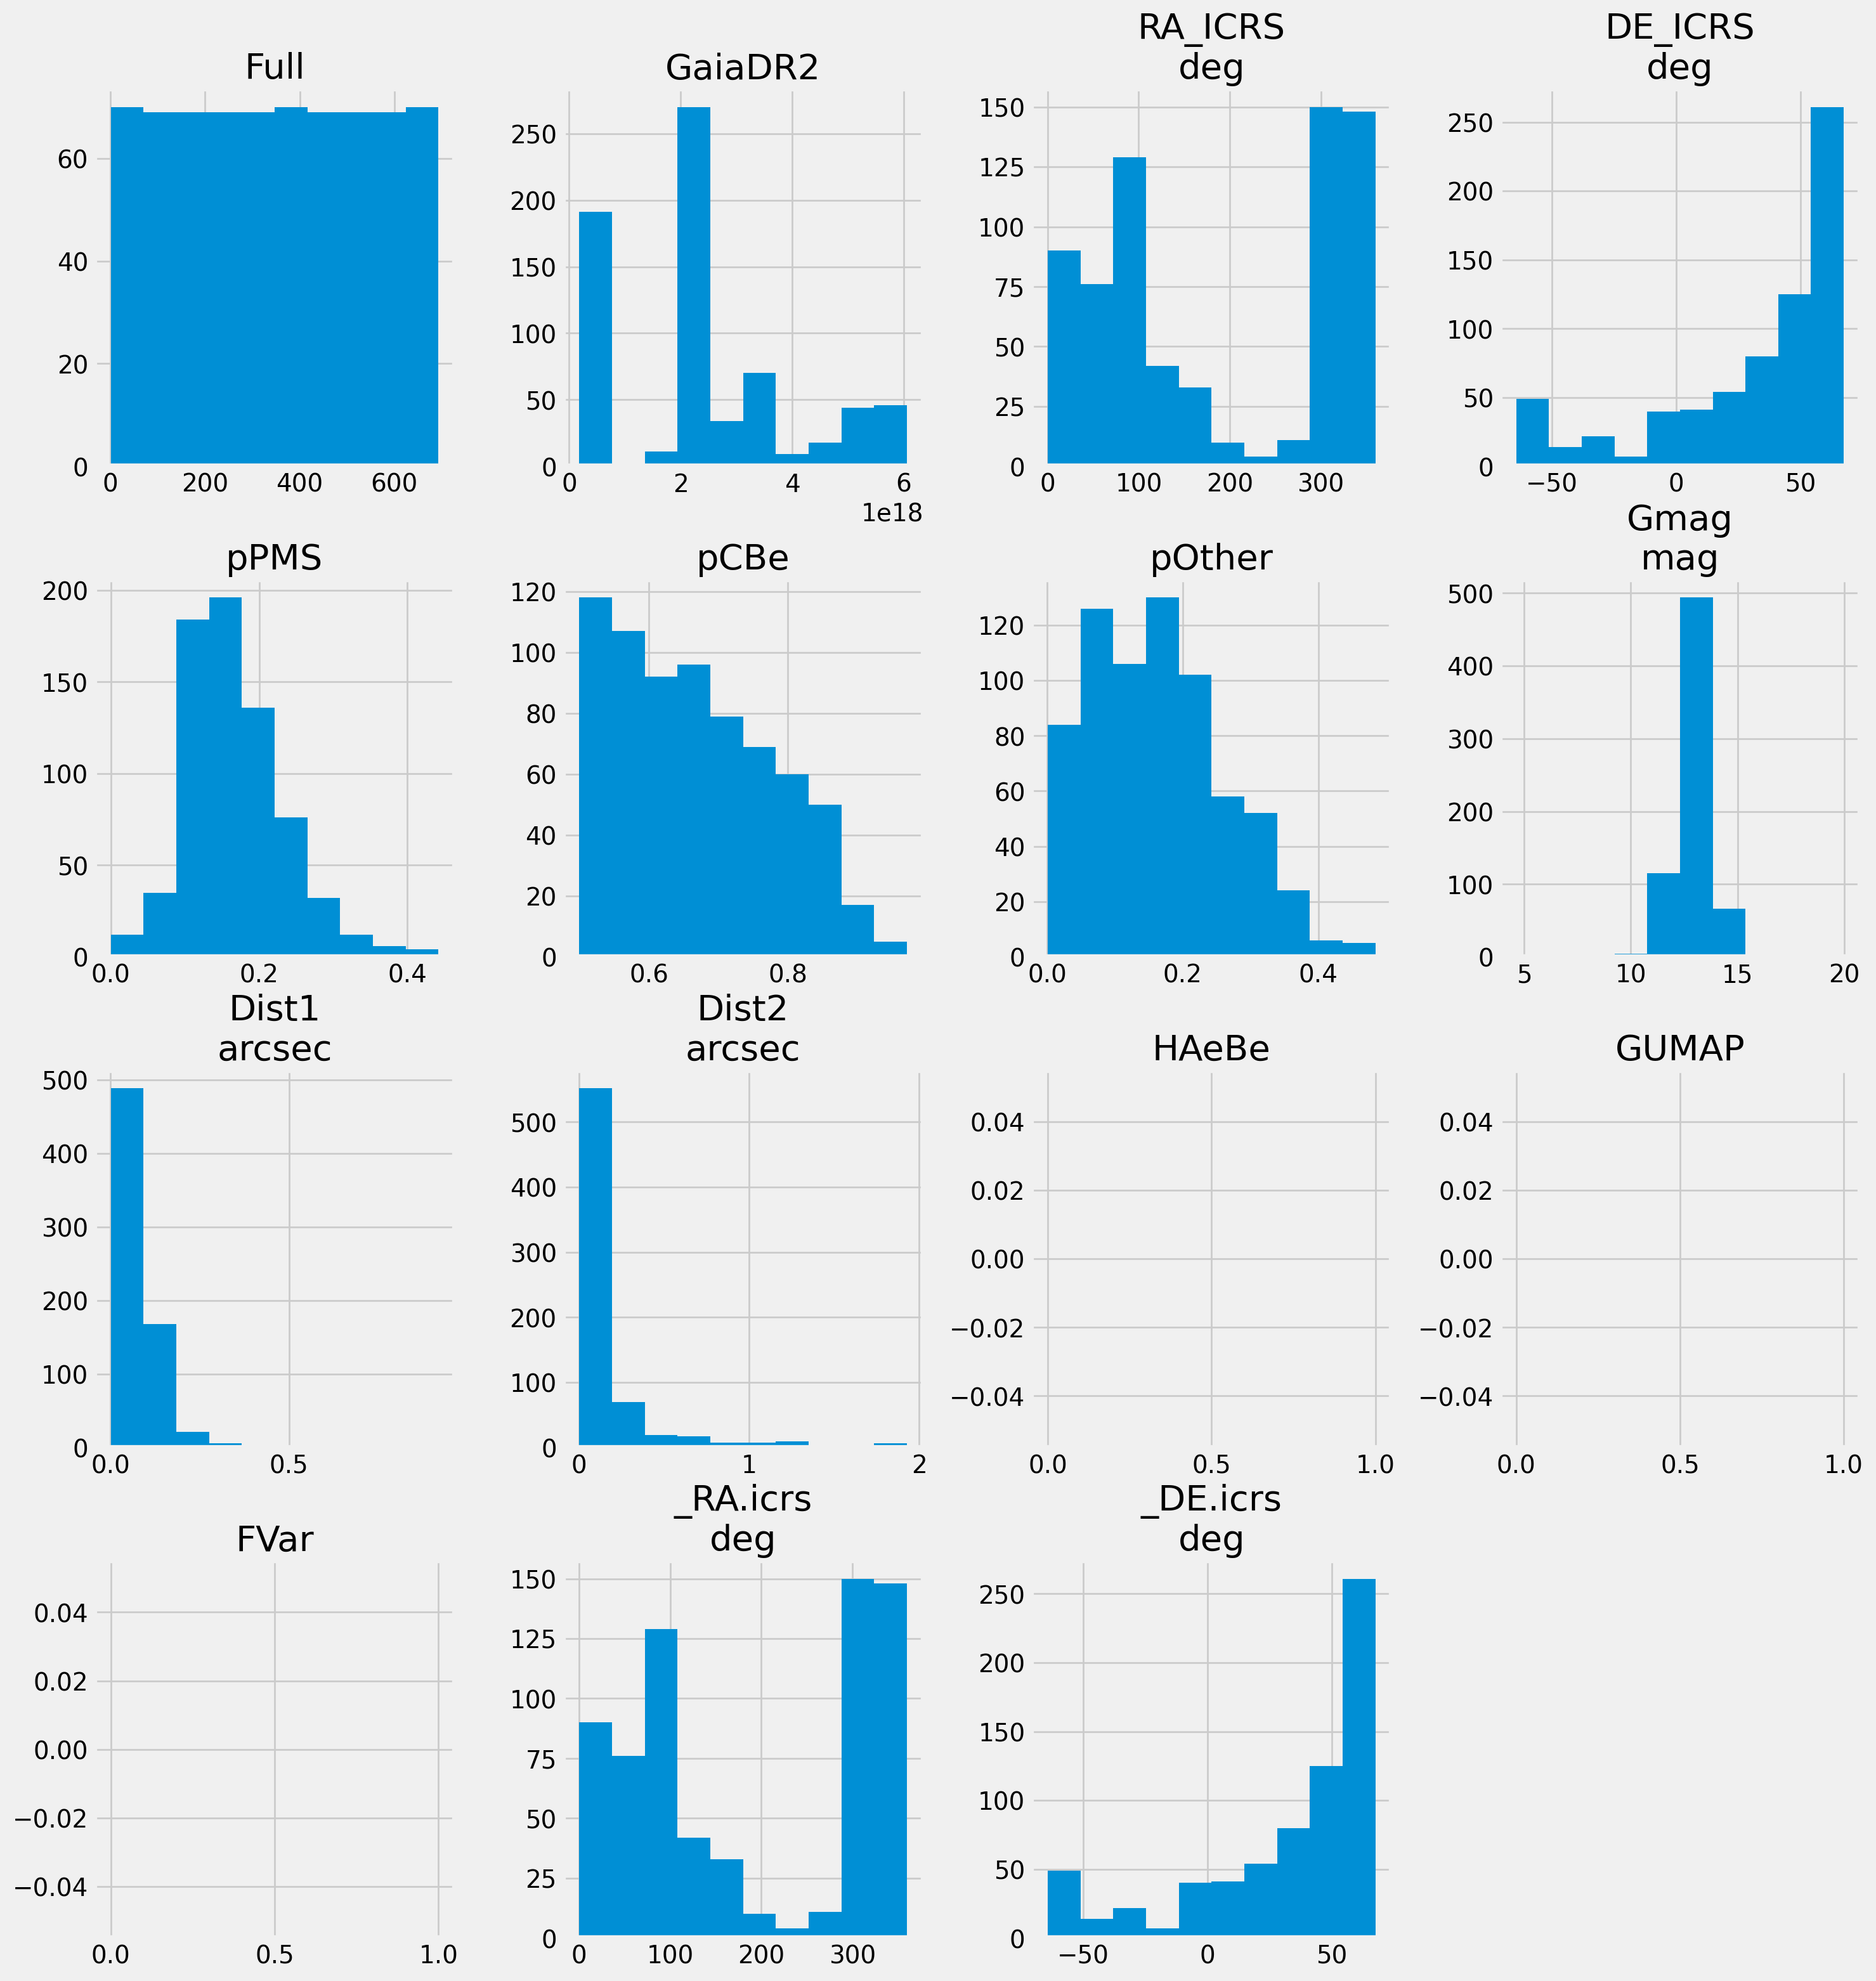

In [34]:
df_cbe_reduced_nadrop.hist(figsize = (16,18))
plt.ylabel('Counts')
plt.show()

Same, but for pms.csv

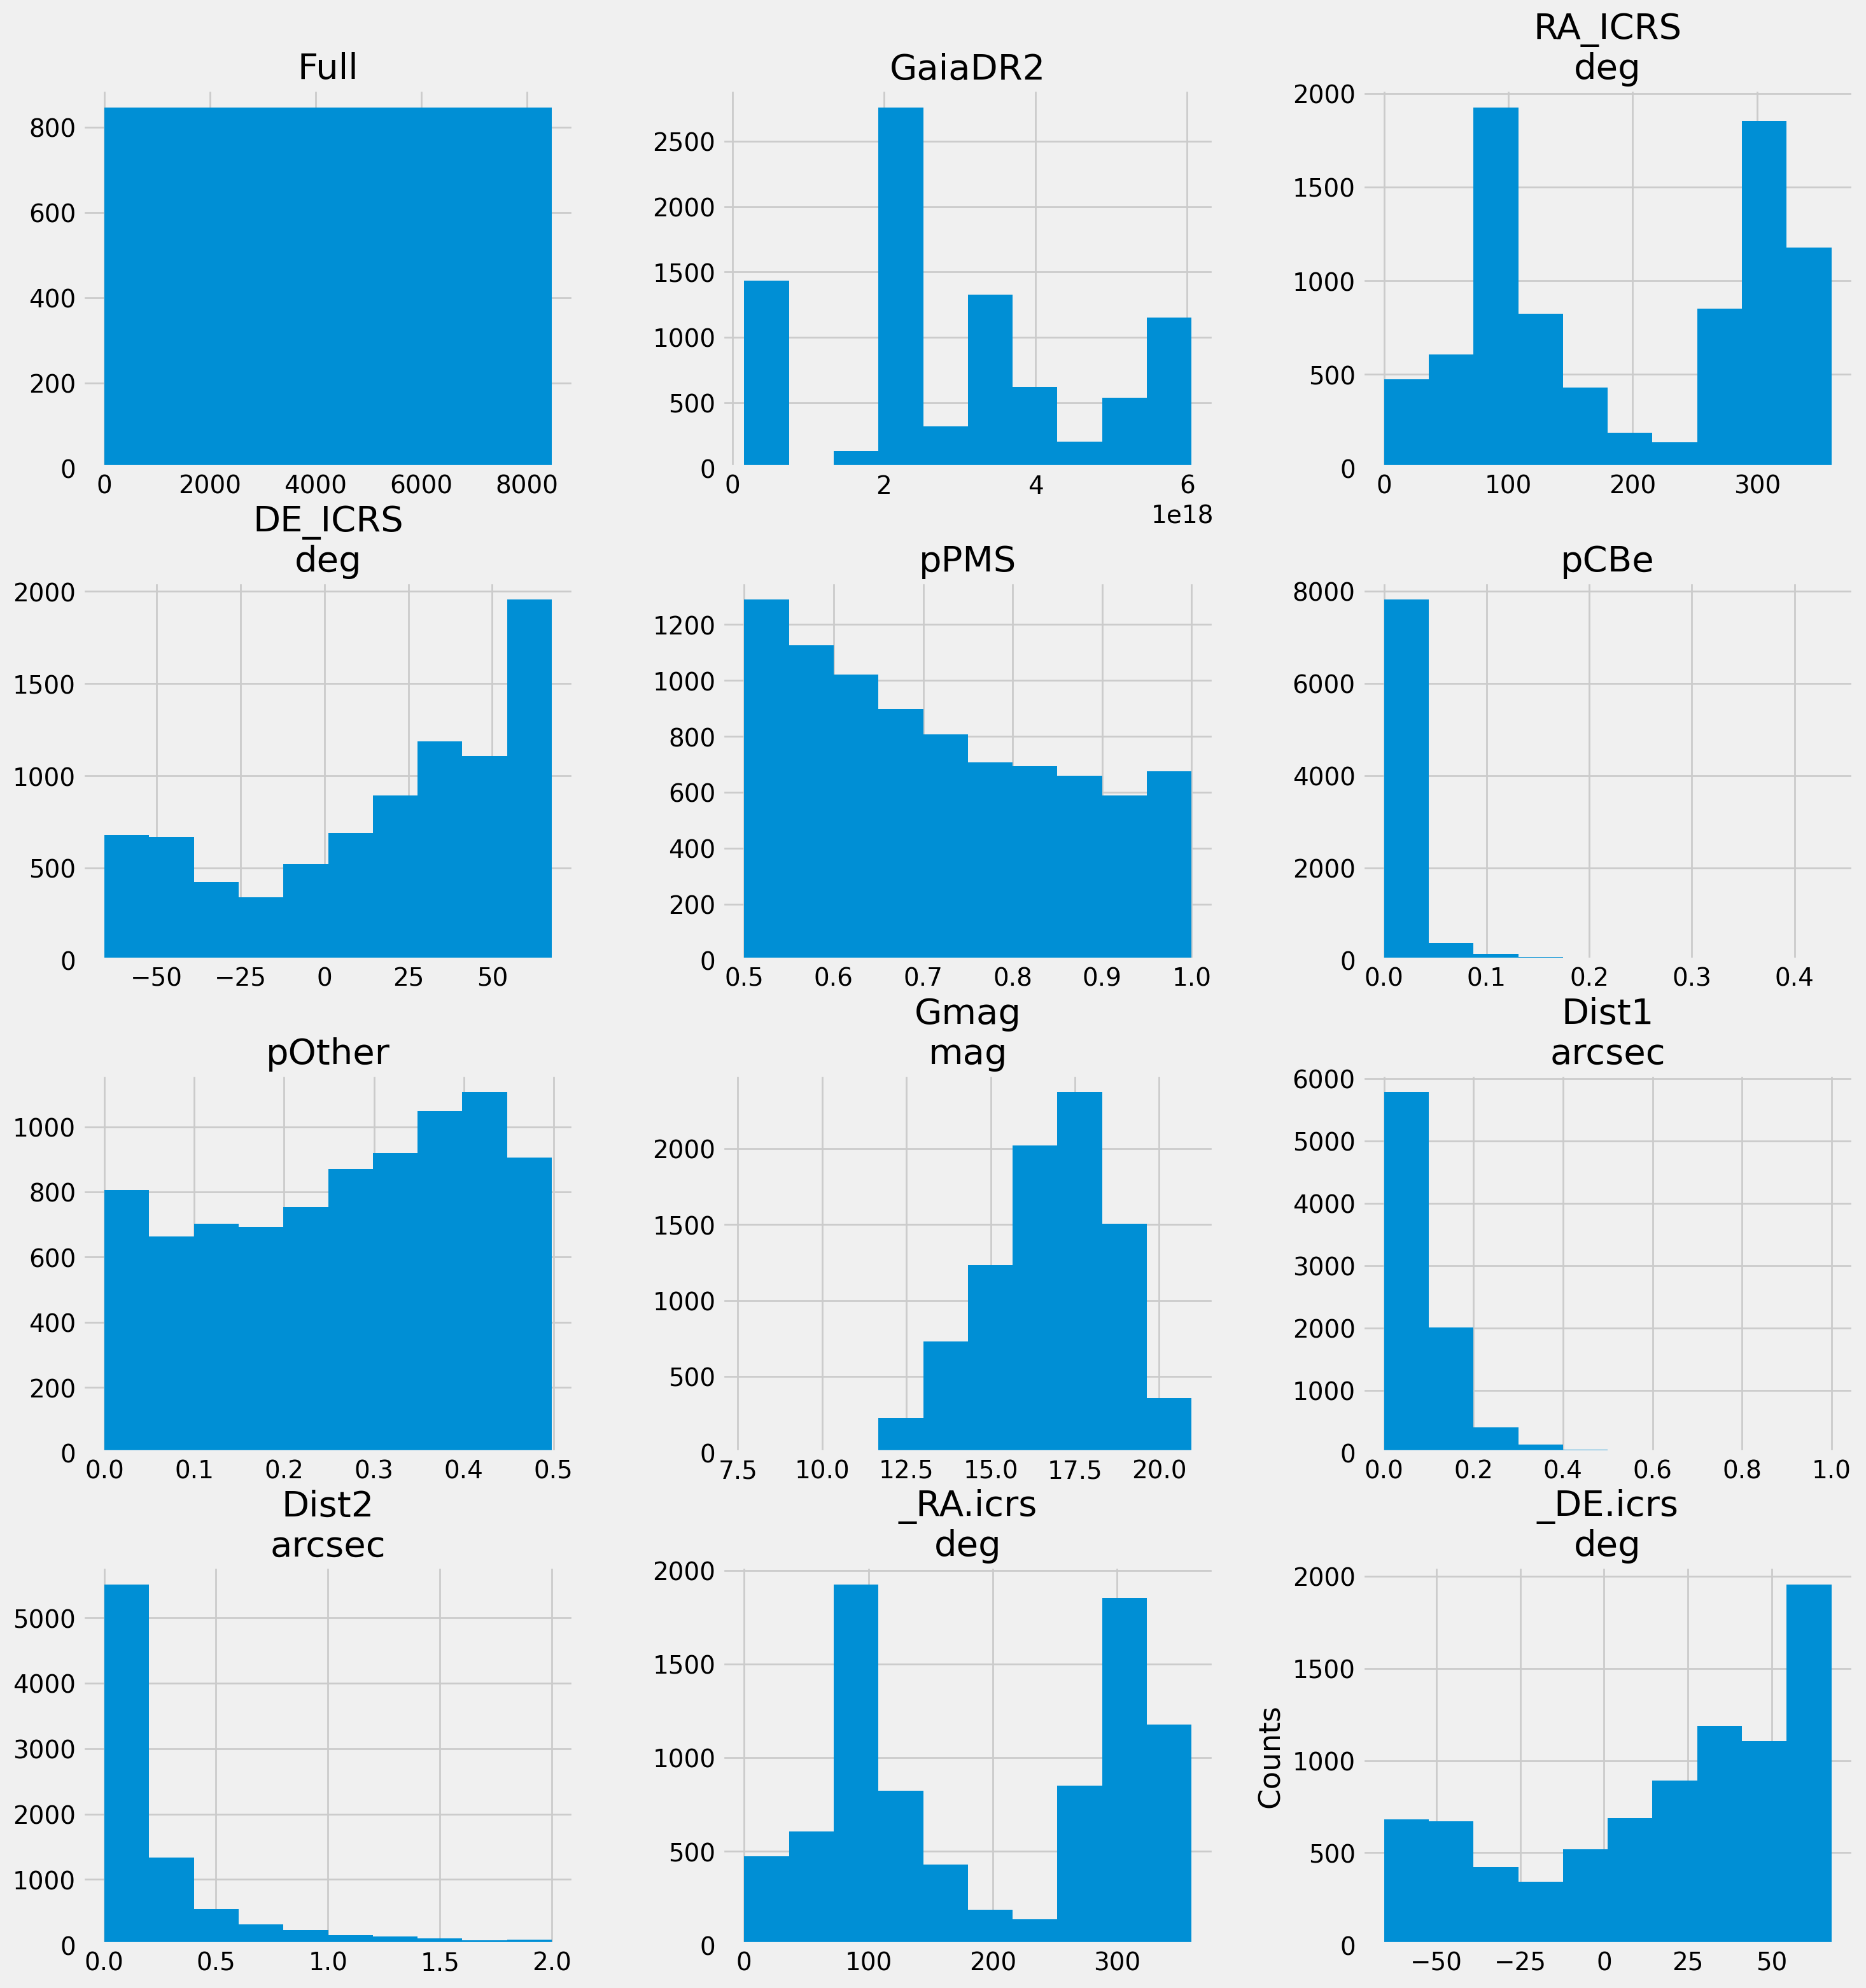

In [33]:
df_pms_reduced_nadrop.hist(figsize = (16,18))
plt.ylabel('Counts')
plt.show()

# Results and Machine Learning

We must import some more packages for this section of the project:

In [9]:
# Import packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model

# Set the config as described in Homework 4
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('fivethirtyeight')

Let's make our data useable with this ML package; first let's get our column names explicitly. They will be the same for all of the three .csv files.

In [10]:
df_either_reduced_nadrop.columns

Index(['Full', 'GaiaDR2', 'RA_ICRS\ndeg', 'DE_ICRS\ndeg', 'pPMS', 'pCBe',
       'pOther', 'Gmag\nmag', 'IVPHAS', 'Dist1\narcsec', 'AllWISE',
       'Dist2\narcsec', 'HAeBe', 'GUMAP', 'FPN', 'FVar', '_RA.icrs\ndeg',
       '_DE.icrs\ndeg'],
      dtype='object')

Now let's use it:

Mean Squared Error (either, RA):  11925.222628633617
R2 Score (either, RA):  0.056608058153154284


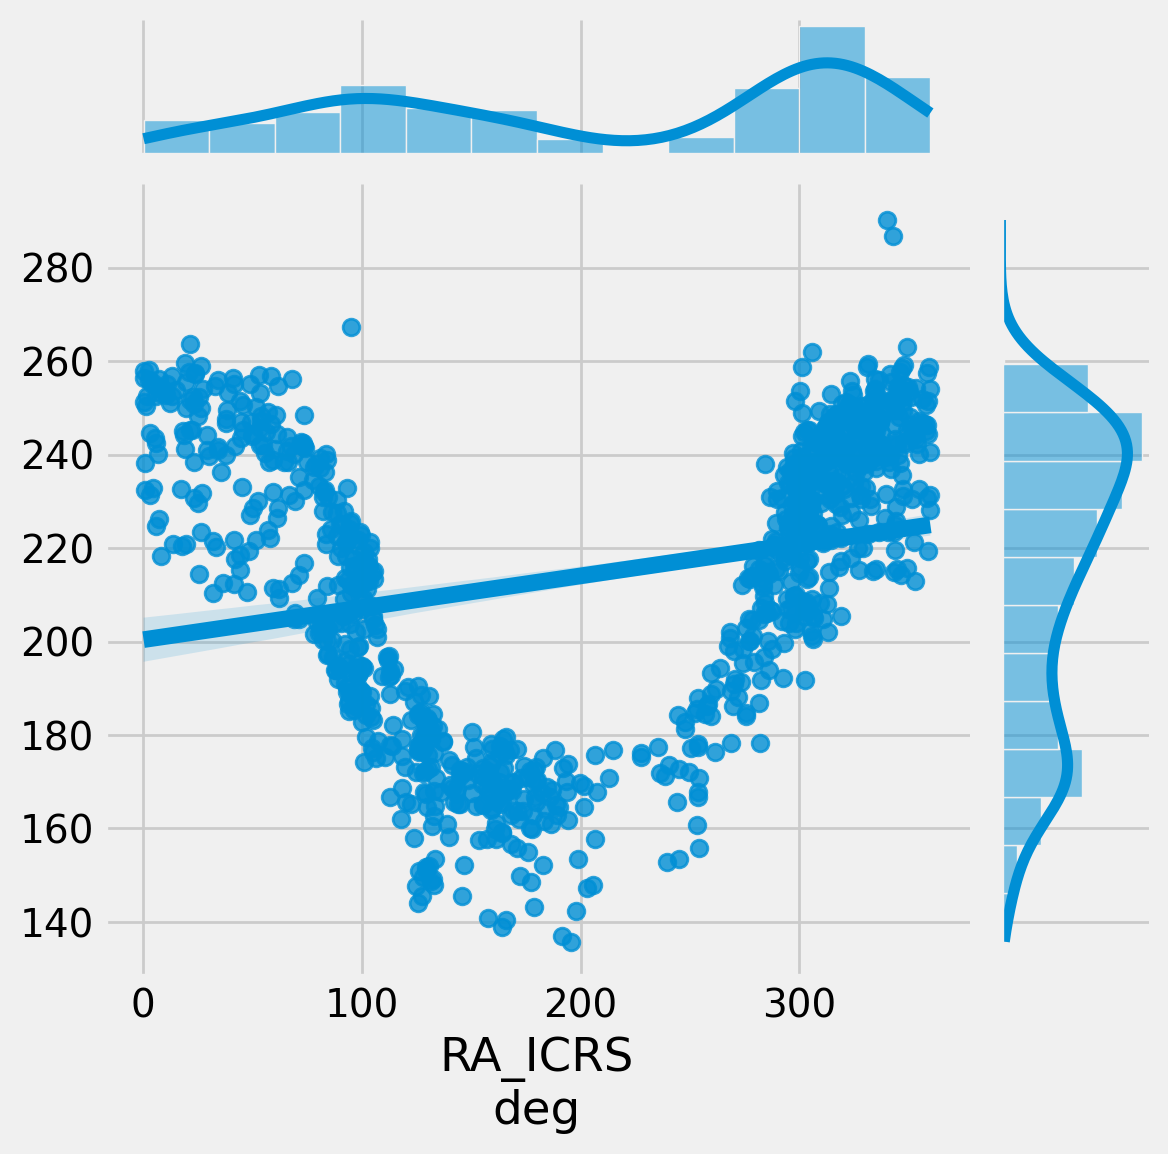

In [18]:
# Select our predictors, the same ones we established previously.
predictors = ['DE_ICRS\ndeg', 'Gmag\nmag', 'Dist1\narcsec'] # evalulate for 'RA_ICRS\ndeg'
# This was suggested as a fix from the colab built in error detector bot

# Initiate model

lm = linear_model.LinearRegression()

# Fit the model on training data, a 80/20 split as discussed in the report.
X_train, X_test, y_train, y_test = train_test_split(df_either_reduced_nadrop[predictors], df_either_reduced_nadrop['RA_ICRS\ndeg'], test_size=0.8, random_state=42) # This is only for either.csv
# This was also suggested as a fix from the colab built in error detector bot

# Get predictions, using the 80/20 split as defined

# 'RA_ICRS\ndeg' first:
X_either_lr = df_either_reduced_nadrop[predictors]

# Fit lm and get predictions

lm.fit(X_train, y_train) # This is only for either.csv

# 'RA_ICRS\ndeg' predictions
y_pred_either = lm.predict(X_test) # This is only for either.csv

# Evaluate for either.csv
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (either, RA): ", mse_either)
print("R2 Score (either, RA): ", r2_either)

# Make plot with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

Now for cbe.csv

Mean Squared Error (cbe, RA):  15907.939672960207
R2 Score (cbe, RA):  -0.00943329020665895


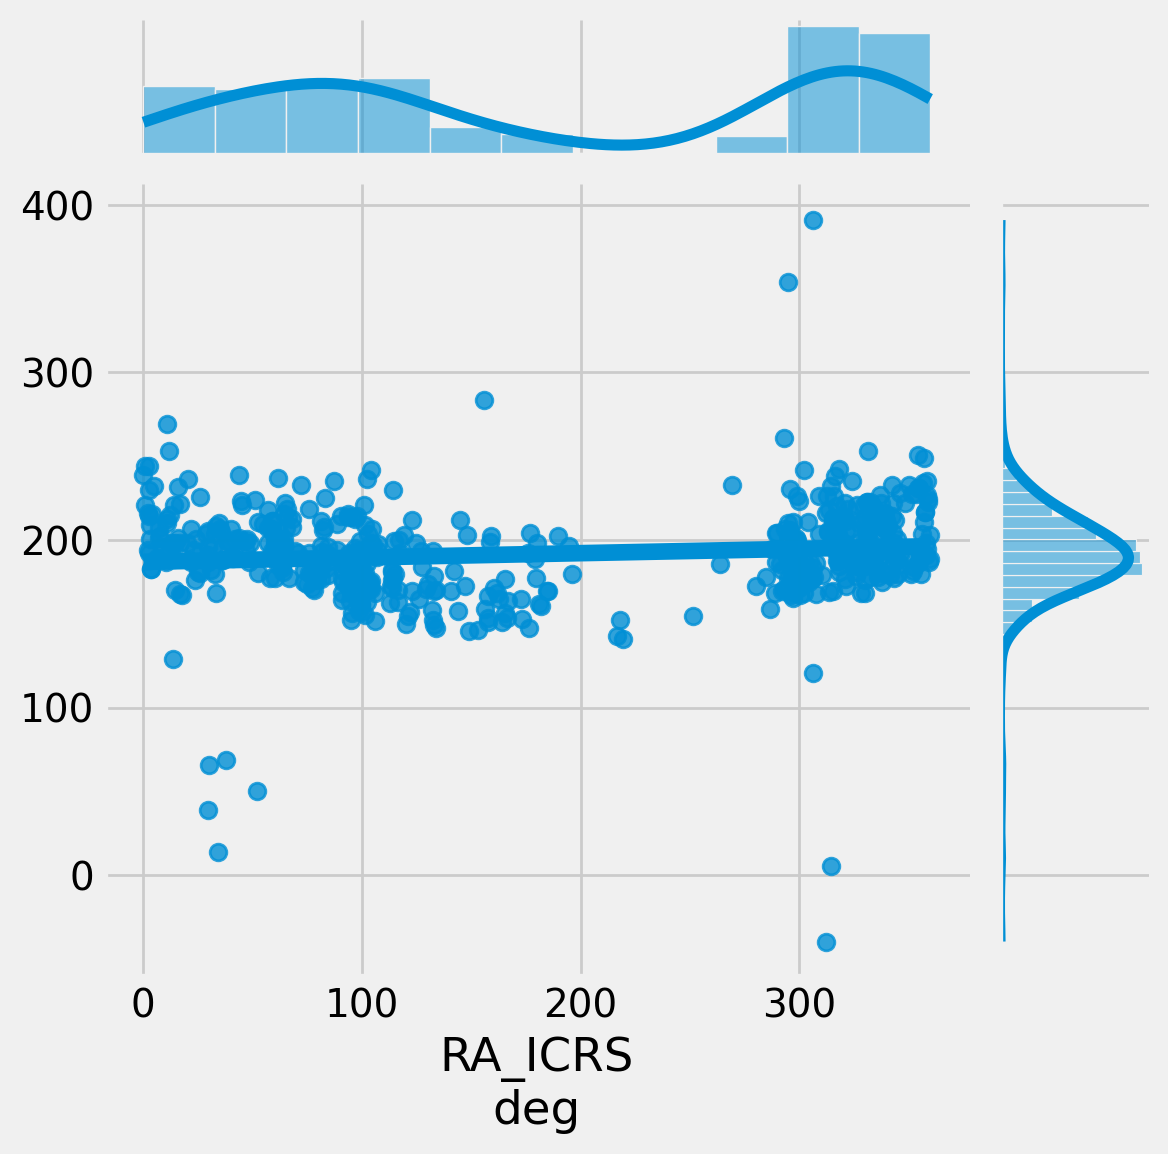

In [21]:
# Select our predictors, the same ones we established previously.
predictors = ['DE_ICRS\ndeg', 'Gmag\nmag', 'Dist1\narcsec'] # evalulate for 'RA_ICRS\ndeg'
# This was suggested as a fix from the colab built in error detector bot

# Initiate model

lm = linear_model.LinearRegression()

# Fit the model on training data, a 80/20 split as discussed in the report.
X_train, X_test, y_train, y_test = train_test_split(df_cbe_reduced_nadrop[predictors], df_cbe_reduced_nadrop['RA_ICRS\ndeg'], test_size=0.8, random_state=42) # This is only for cbe.csv
# This was also suggested as a fix from the colab built in error detector bot

# Get predictions, using the 80/20 split as defined

# 'RA_ICRS\ndeg' first:
X_either_lr = df_cbe_reduced_nadrop[predictors]

# Fit lm and get predictions

lm.fit(X_train, y_train) # This is only for cbe.csv

# 'RA_ICRS\ndeg' predictions
y_pred_either = lm.predict(X_test) # This is only for cbe.csv

# Evaluate for either.csv
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (cbe, RA): ", mse_either)
print("R2 Score (cbe, RA): ", r2_either)

# Make plot with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

now for pms.csv

Mean Squared Error (pms, RA):  11954.420475466623
R2 Score (pms, RA):  0.0504776698659446


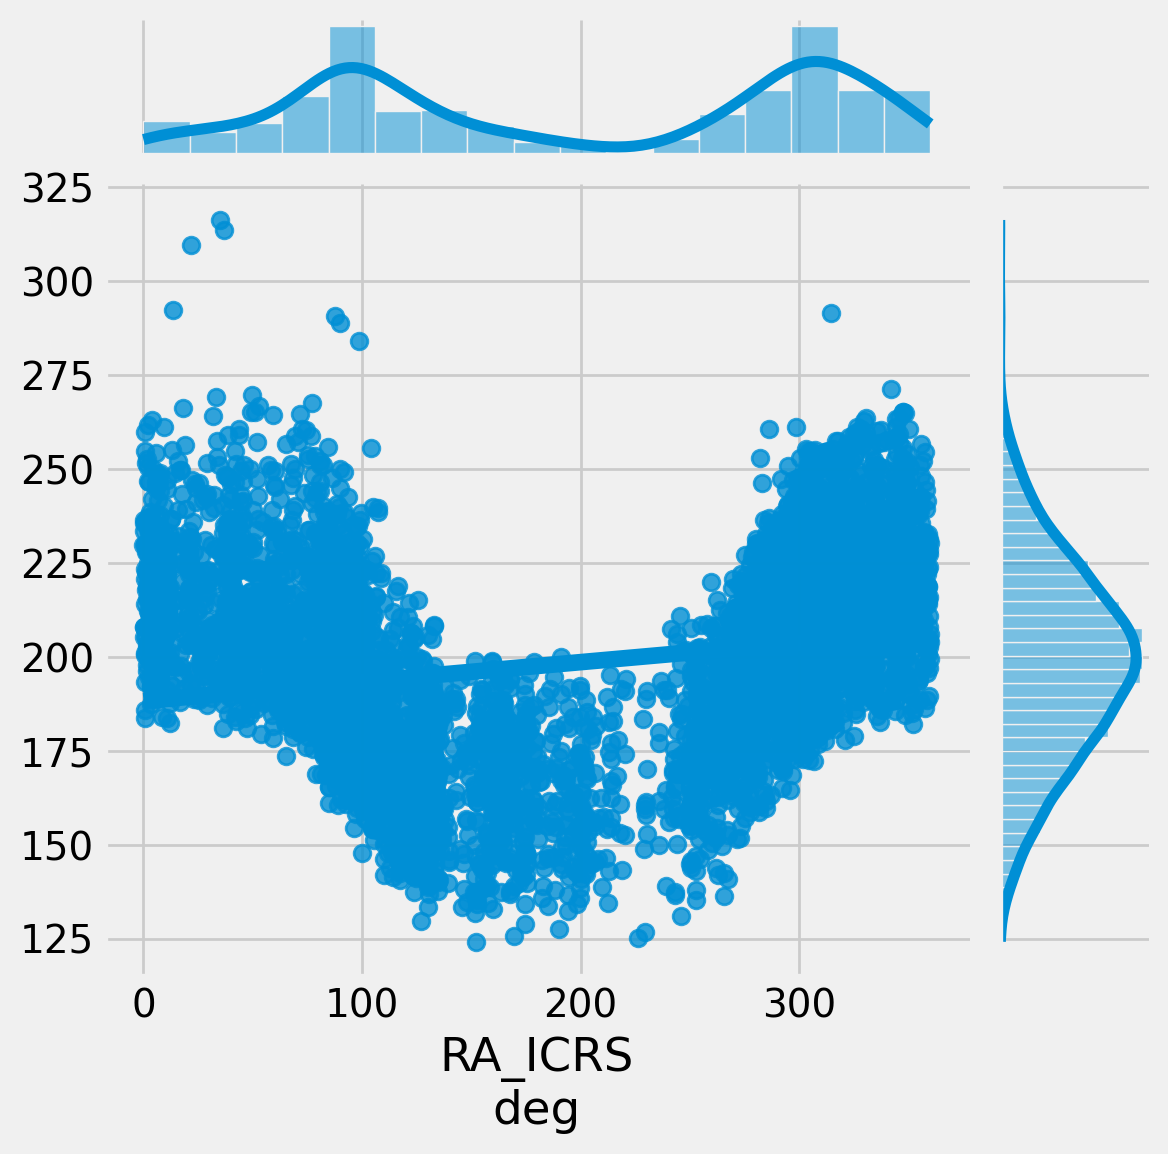

In [22]:
# Select our predictors, the same ones we established previously.
predictors = ['DE_ICRS\ndeg', 'Gmag\nmag', 'Dist1\narcsec'] # evalulate for 'RA_ICRS\ndeg'
# This was suggested as a fix from the colab built in error detector bot

# Initiate model

lm = linear_model.LinearRegression()

# Fit the model on training data, a 80/20 split as discussed in the report.
X_train, X_test, y_train, y_test = train_test_split(df_pms_reduced_nadrop[predictors], df_pms_reduced_nadrop['RA_ICRS\ndeg'], test_size=0.8, random_state=42) # This is only for pms.csv
# This was also suggested as a fix from the colab built in error detector bot

# Get predictions, using the 80/20 split as defined

# 'RA_ICRS\ndeg' first:
X_either_lr = df_pms_reduced_nadrop[predictors]

# Fit lm and get predictions

lm.fit(X_train, y_train) # This is only for pms.csv

# 'RA_ICRS\ndeg' predictions
y_pred_either = lm.predict(X_test) # This is only for pms.csv

# Evaluate for either.csv
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (pms, RA): ", mse_either)
print("R2 Score (pms, RA): ", r2_either)

# Make plot with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

Repeat for the other values:

Mean Squared Error (either, DE):  1775.6653110442633
R2 Score (either, DE):  0.046376554599063535


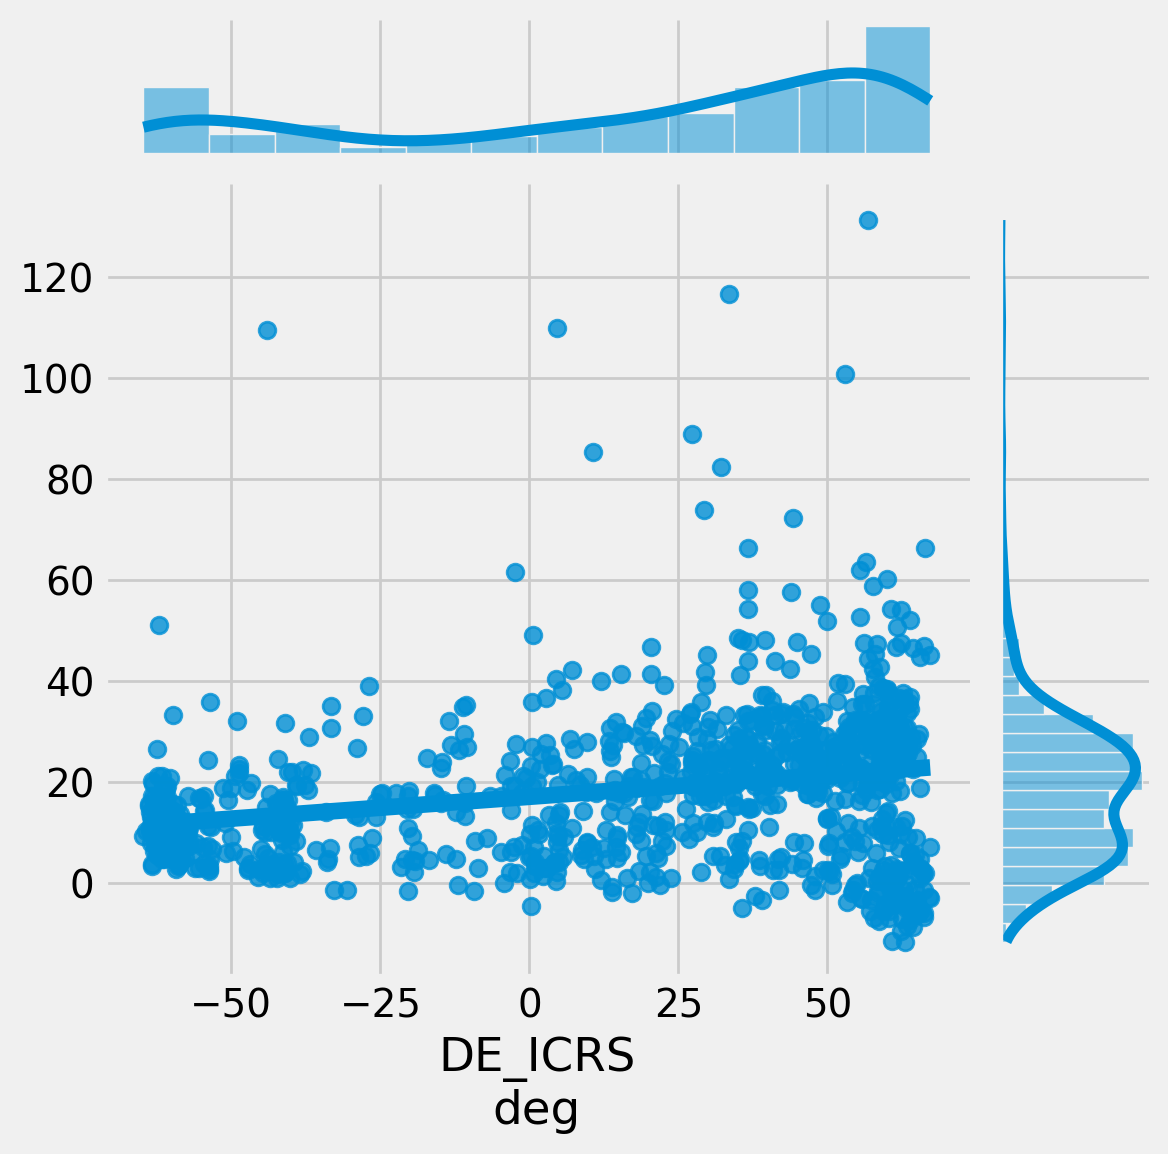

In [23]:
predictors = ['RA_ICRS\ndeg', 'Gmag\nmag', 'Dist1\narcsec'] # evalulate for 'DE_ICRS\ndeg'
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_either_reduced_nadrop[predictors], df_either_reduced_nadrop['DE_ICRS\ndeg'], test_size=0.8, random_state=42)
X_either_lr = df_either_reduced_nadrop[predictors]
lm.fit(X_train, y_train)
y_pred_either = lm.predict(X_test)

# Evaluate
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (either, DE): ", mse_either)
print("R2 Score (either, DE): ", r2_either)

# Make plots with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

now for cbe.csv

Mean Squared Error (cbe, DE):  1351.2333499832619
R2 Score (cbe, DE):  0.0232269082532911


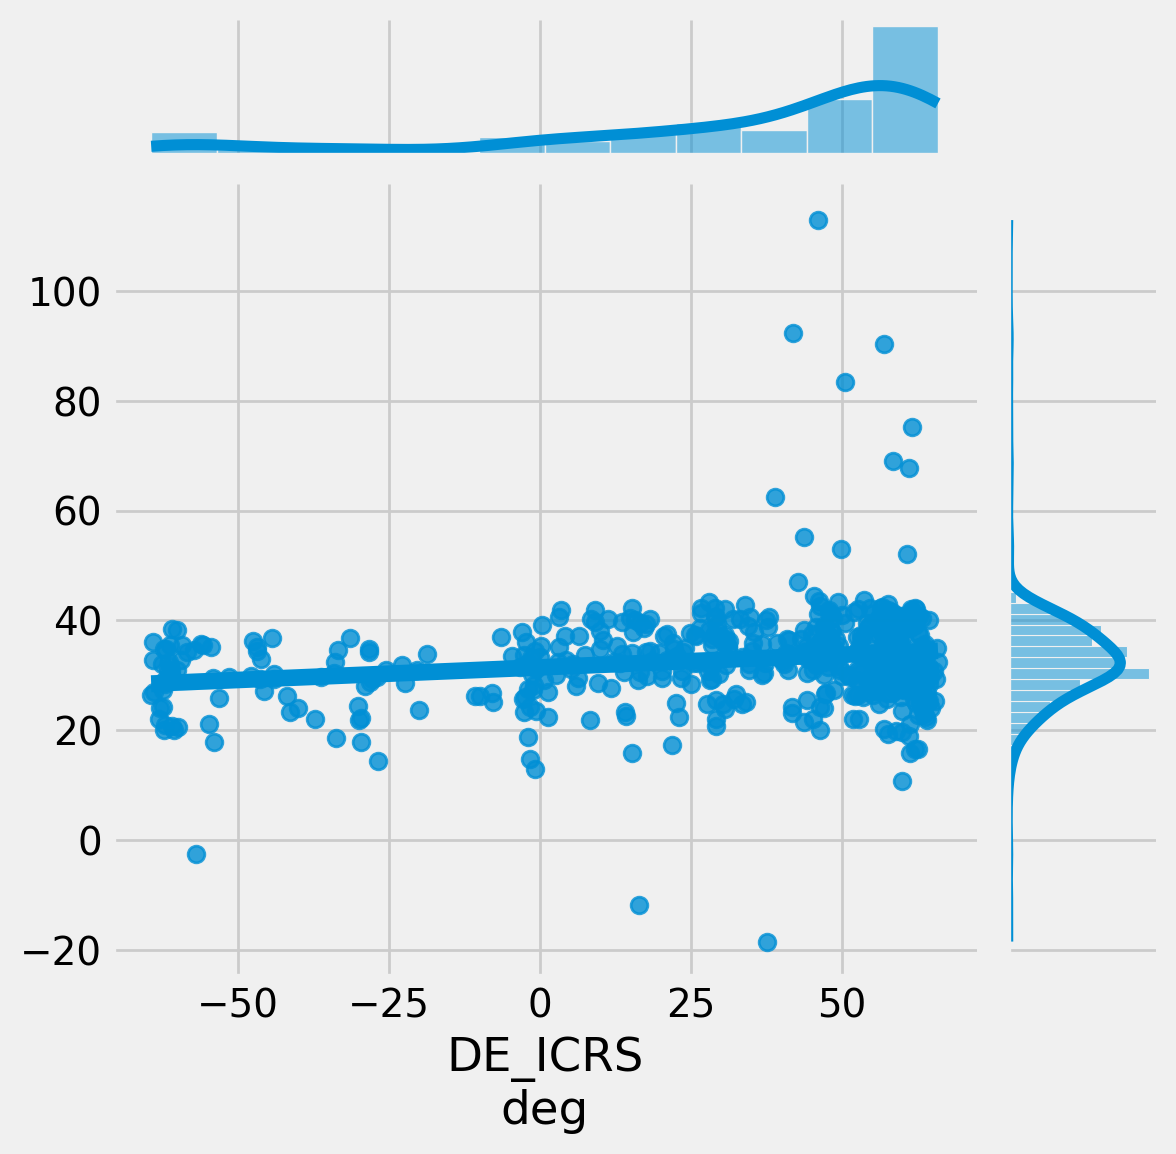

In [25]:
predictors = ['RA_ICRS\ndeg', 'Gmag\nmag', 'Dist1\narcsec'] # evalulate for 'DE_ICRS\ndeg'
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_cbe_reduced_nadrop[predictors], df_cbe_reduced_nadrop['DE_ICRS\ndeg'], test_size=0.8, random_state=42)
X_either_lr = df_cbe_reduced_nadrop[predictors]
lm.fit(X_train, y_train)
y_pred_either = lm.predict(X_test)

# Evaluate
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (cbe, DE): ", mse_either)
print("R2 Score (cbe, DE): ", r2_either)

# Make plots with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

now for pms

Mean Squared Error (either, DE):  1487.6971309749672
R2 Score (either, DE):  0.07162056543981898


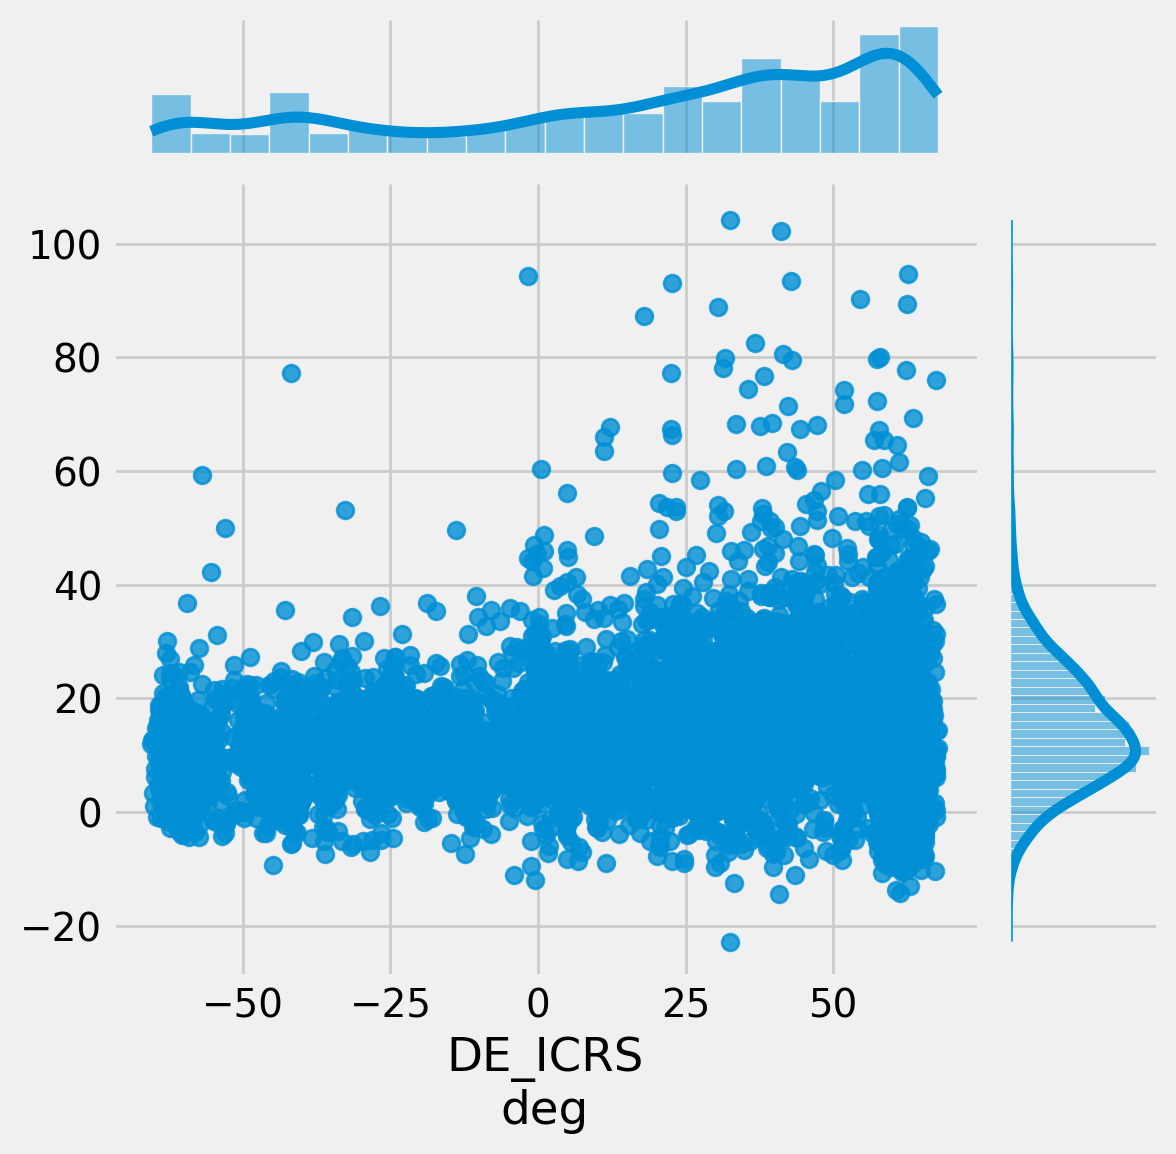

In [24]:
predictors = ['RA_ICRS\ndeg', 'Gmag\nmag', 'Dist1\narcsec'] # evalulate for 'DE_ICRS\ndeg'
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_pms_reduced_nadrop[predictors], df_pms_reduced_nadrop['DE_ICRS\ndeg'], test_size=0.8, random_state=42)
X_either_lr = df_pms_reduced_nadrop[predictors]
lm.fit(X_train, y_train)
y_pred_either = lm.predict(X_test)

# Evaluate
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (pms, DE): ", mse_either)
print("R2 Score (pms, DE): ", r2_either)

# Make plots with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

now for gmag\nmag

Mean Squared Error (either, GMAG):  5.029007246176797
R2 Score (either, GMAG):  0.019622620692589576


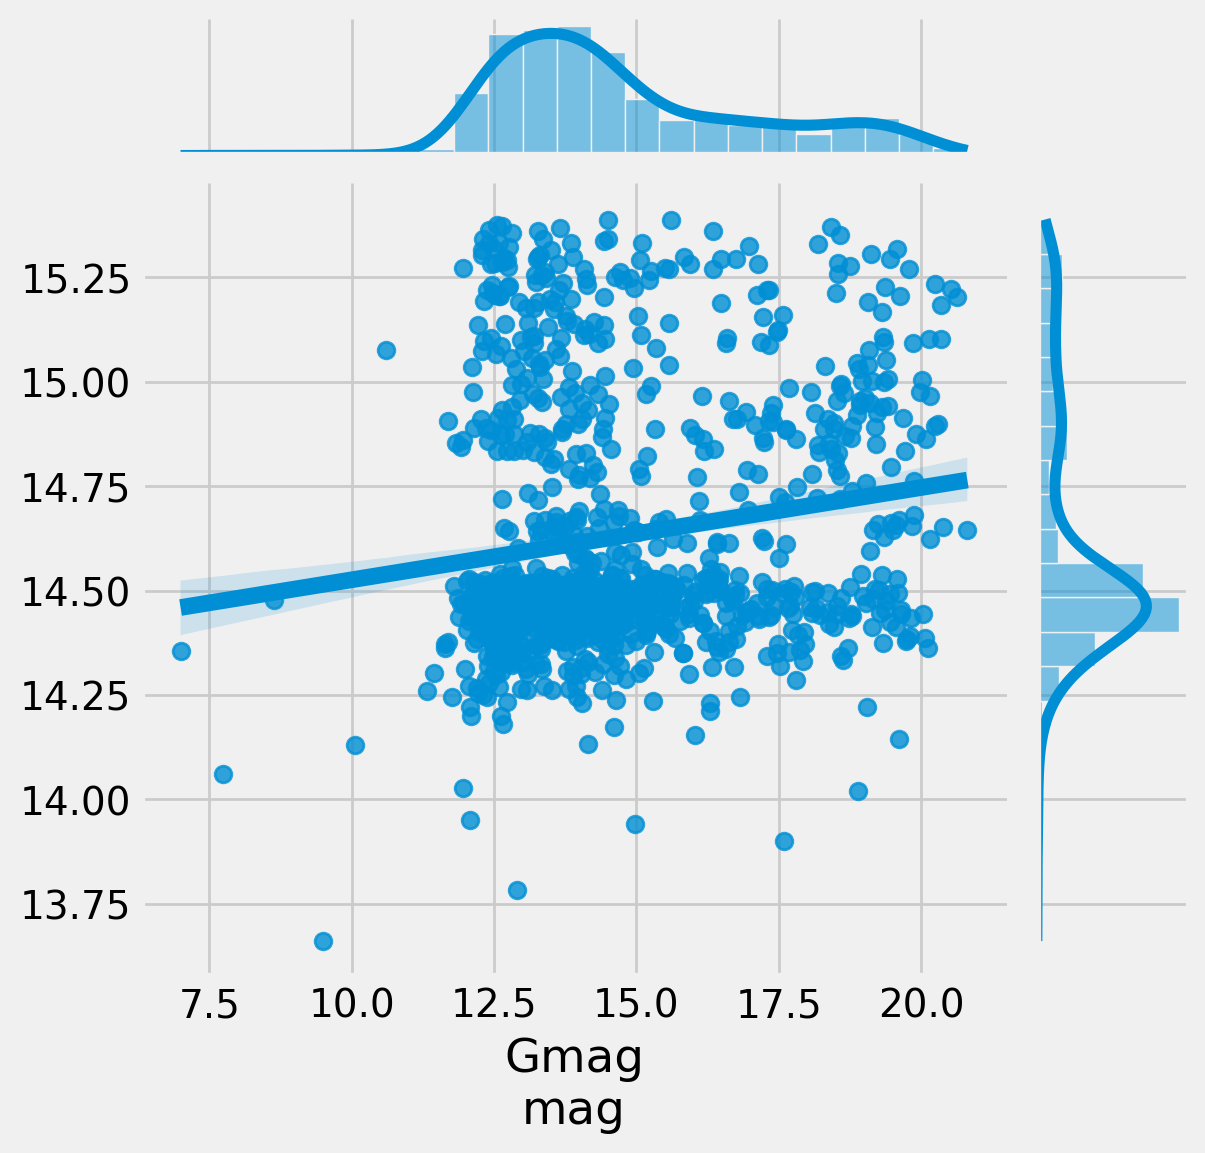

In [26]:
predictors = ['RA_ICRS\ndeg', 'DE_ICRS\ndeg', 'Dist1\narcsec'] # evalulate for 'Gmag\nmag'
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_either_reduced_nadrop[predictors], df_either_reduced_nadrop['Gmag\nmag'], test_size=0.8, random_state=42)
X_either_lr = df_either_reduced_nadrop[predictors]
lm.fit(X_train, y_train)
y_pred_either = lm.predict(X_test)

# Evaluate for either.csv
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (either, GMAG): ", mse_either)
print("R2 Score (either, GMAG): ", r2_either)

# Make plot with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

cbe

Mean Squared Error (cbe, GMAG):  1.023335909334743
R2 Score (cbe, GMAG):  0.09431211469864509


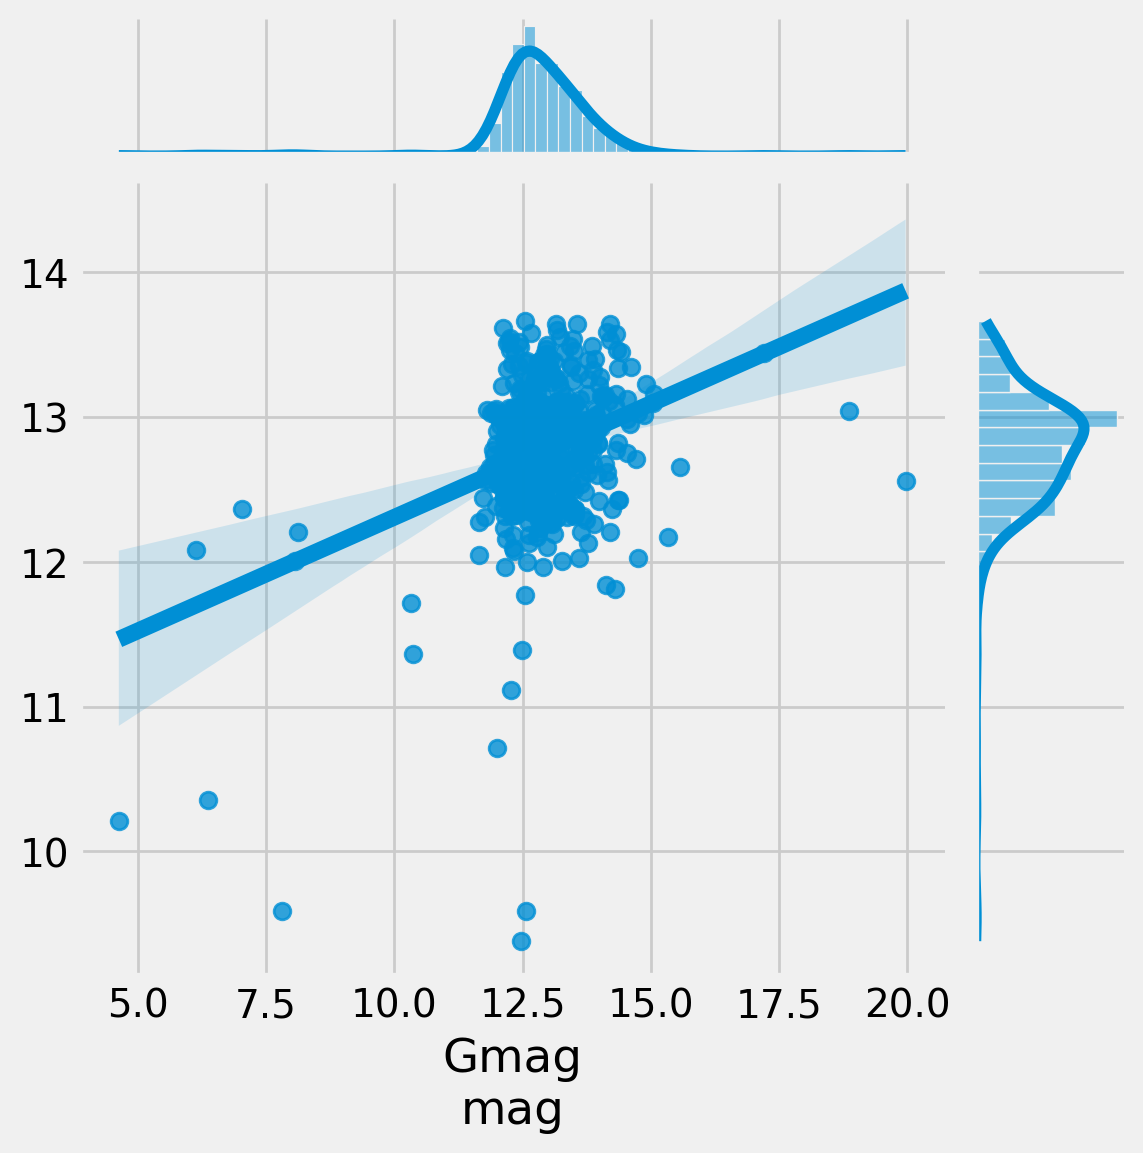

In [27]:
predictors = ['RA_ICRS\ndeg', 'DE_ICRS\ndeg', 'Dist1\narcsec'] # evalulate for 'Gmag\nmag'
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_cbe_reduced_nadrop[predictors], df_cbe_reduced_nadrop['Gmag\nmag'], test_size=0.8, random_state=42)
X_either_lr = df_cbe_reduced_nadrop[predictors]
lm.fit(X_train, y_train)
y_pred_either = lm.predict(X_test)

# Evaluate
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (cbe, GMAG): ", mse_either)
print("R2 Score (cbe, GMAG): ", r2_either)

# Make plot with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

pms

Mean Squared Error (pms, GMAG):  3.3088543346102304
R2 Score (pms, GMAG):  0.05083942903430716


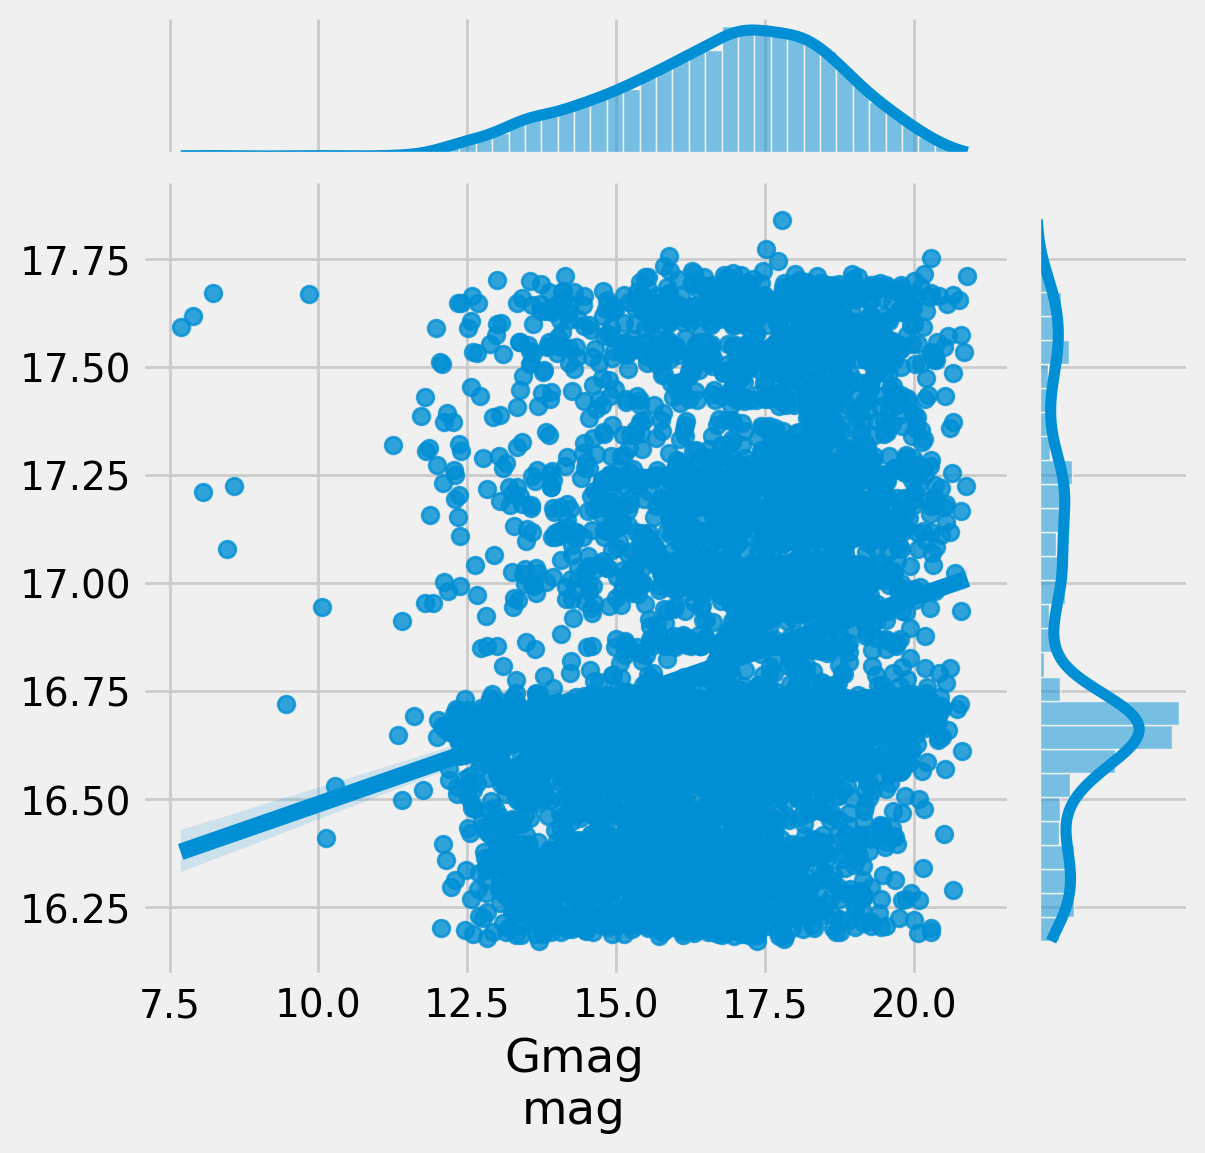

In [28]:
predictors = ['RA_ICRS\ndeg', 'DE_ICRS\ndeg', 'Dist1\narcsec'] # evalulate for 'Gmag\nmag'
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_pms_reduced_nadrop[predictors], df_pms_reduced_nadrop['Gmag\nmag'], test_size=0.8, random_state=42)
X_either_lr = df_pms_reduced_nadrop[predictors]
lm.fit(X_train, y_train)
y_pred_either = lm.predict(X_test)

# Evaluate
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (pms, GMAG): ", mse_either)
print("R2 Score (pms, GMAG): ", r2_either)

# Make plot with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

Dist1\narcsec

Mean Squared Error (either, DIST):  0.008311512765315814
R2 Score (either, DIST):  0.021654701160479073


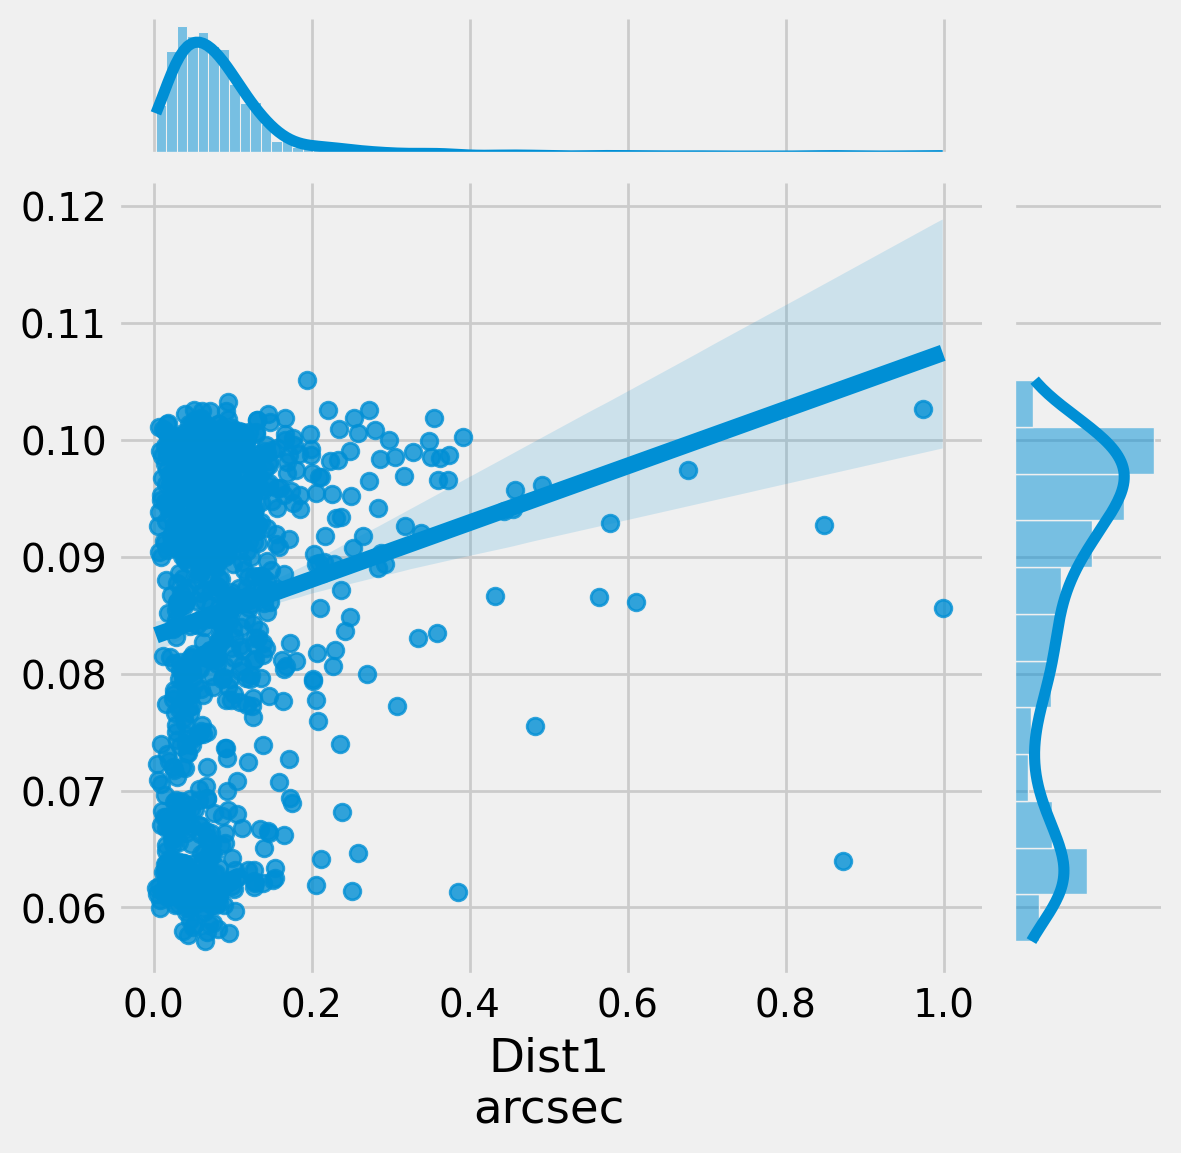

In [29]:
predictors = ['RA_ICRS\ndeg', 'DE_ICRS\ndeg', 'Gmag\nmag'] # evalulate for 'Dist1\narcsec'
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_either_reduced_nadrop[predictors], df_either_reduced_nadrop['Dist1\narcsec'], test_size=0.8, random_state=42)
X_either_lr = df_either_reduced_nadrop[predictors]
lm.fit(X_train, y_train)
y_pred_either = lm.predict(X_test)

# Evaluate for either.csv
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (either, DIST): ", mse_either)
print("R2 Score (either, DIST): ", r2_either)

# Make plot with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

cbe

Mean Squared Error (cbe, DIST):  0.006841796718971024
R2 Score (cbe, DIST):  0.11740333663927893


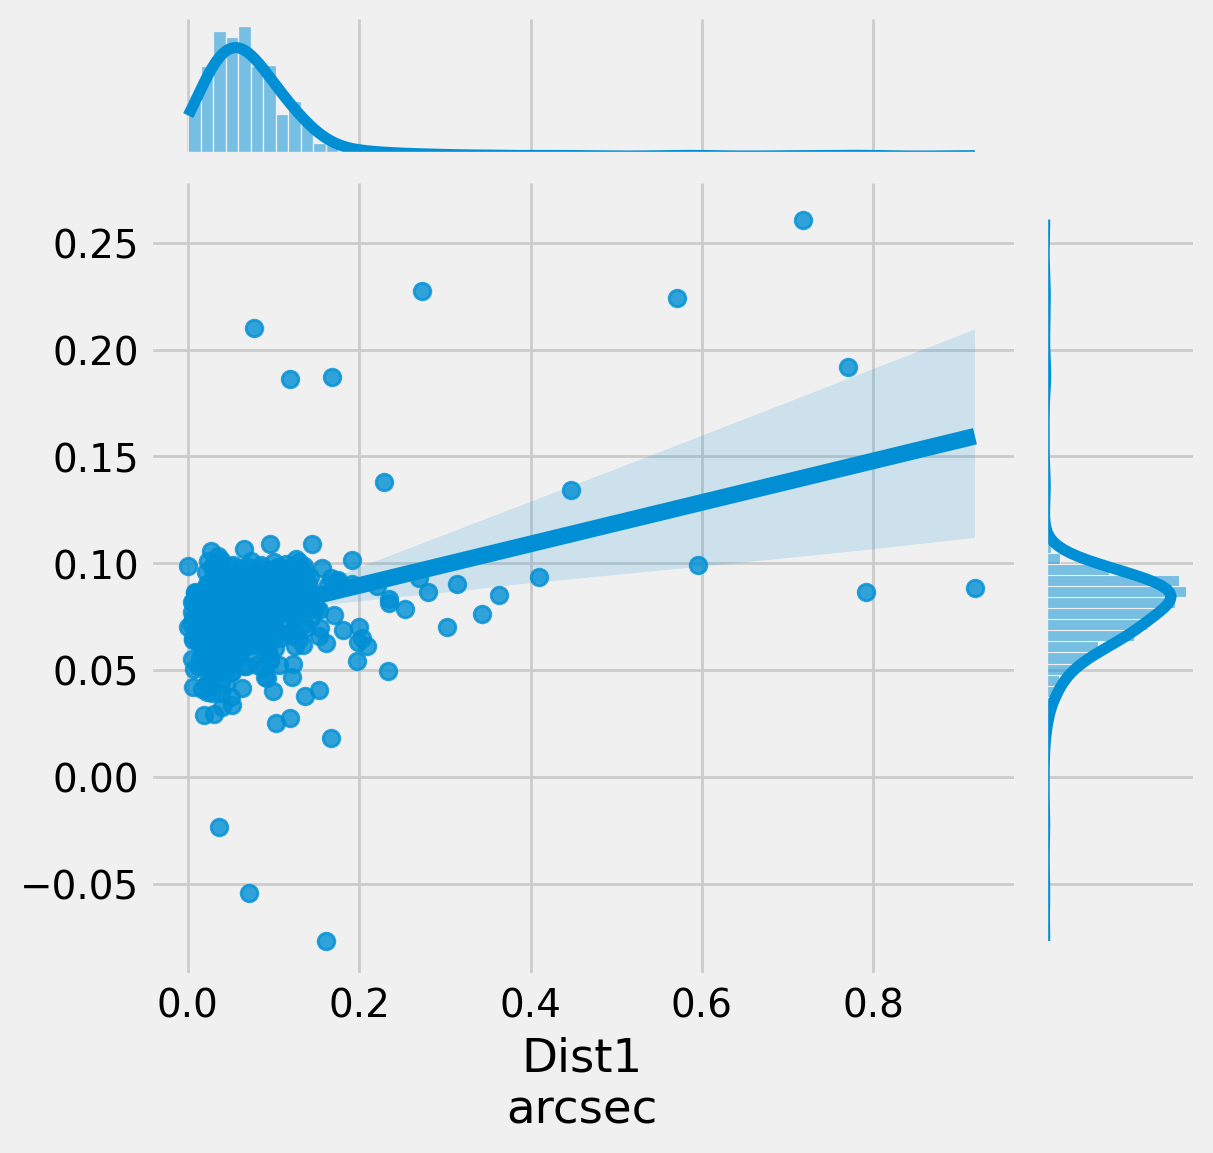

In [30]:
predictors = ['RA_ICRS\ndeg', 'DE_ICRS\ndeg', 'Gmag\nmag'] # evalulate for 'Dist1\narcsec'
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_cbe_reduced_nadrop[predictors], df_cbe_reduced_nadrop['Dist1\narcsec'], test_size=0.8, random_state=42)
X_either_lr = df_cbe_reduced_nadrop[predictors]
lm.fit(X_train, y_train)
y_pred_either = lm.predict(X_test)

# Evaluate for either.csv
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (cbe, DIST): ", mse_either)
print("R2 Score (cbe, DIST): ", r2_either)

# Make plot with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')

pms

Mean Squared Error (pms, DIST):  0.008530635987177737
R2 Score (pms, DIST):  0.04263456180045955


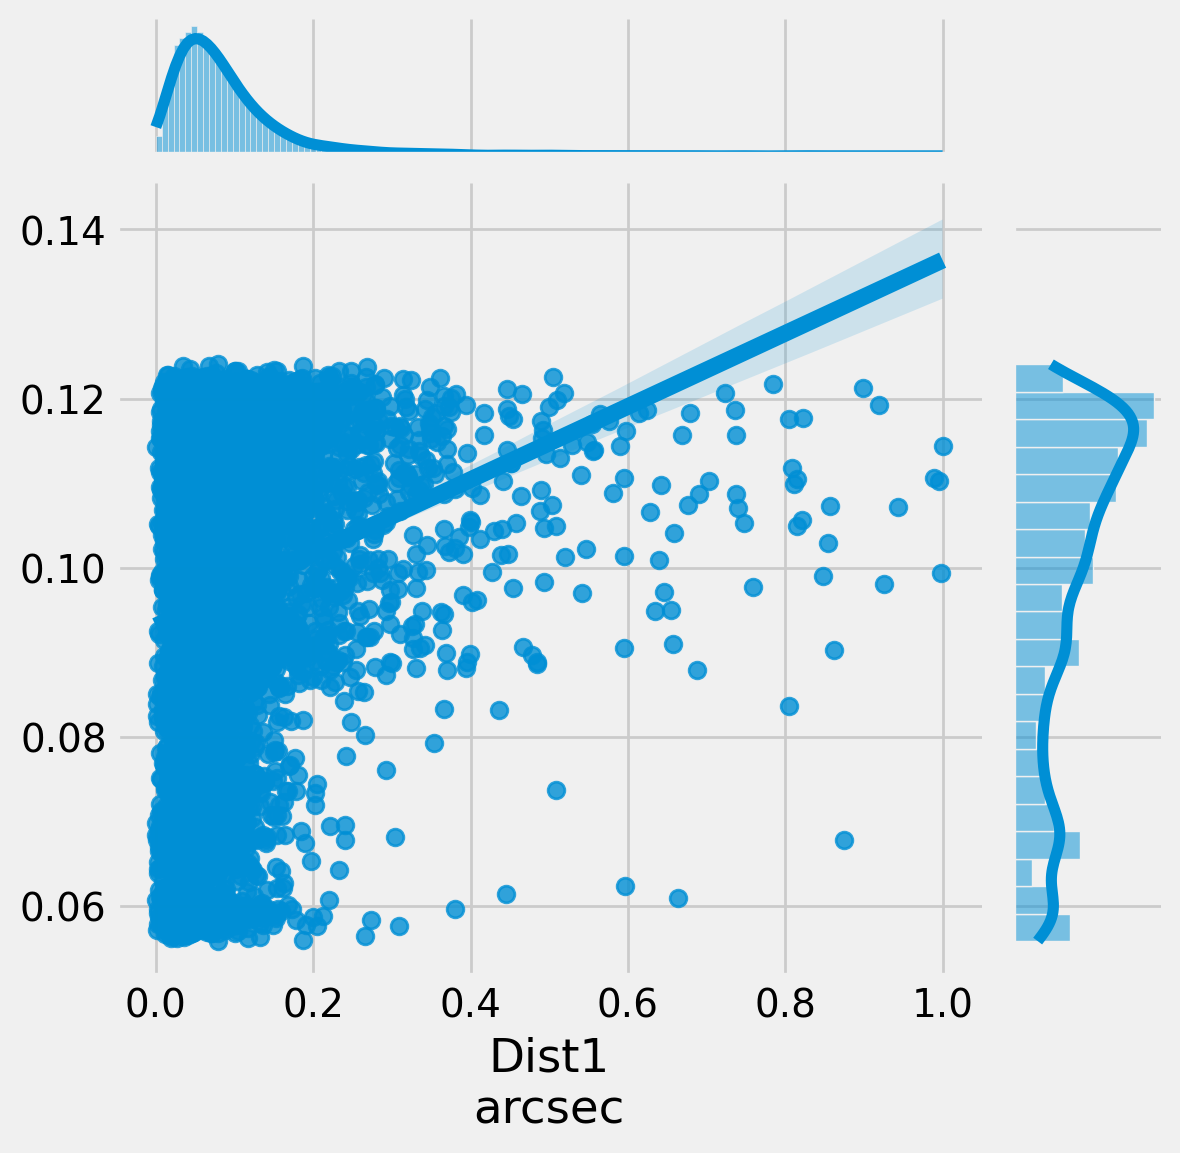

In [32]:
predictors = ['RA_ICRS\ndeg', 'DE_ICRS\ndeg', 'Gmag\nmag'] # evalulate for 'Dist1\narcsec'
lm = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_pms_reduced_nadrop[predictors], df_pms_reduced_nadrop['Dist1\narcsec'], test_size=0.8, random_state=42)
X_either_lr = df_pms_reduced_nadrop[predictors]
lm.fit(X_train, y_train)
y_pred_either = lm.predict(X_test)

# Evaluate
mse_either = mean_squared_error(y_test, y_pred_either)
r2_either = r2_score(y_test, y_pred_either)
print("Mean Squared Error (pms, DIST): ", mse_either)
print("R2 Score (pms, DIST): ", r2_either)

# Make plot with sns
sns.jointplot(x=y_test, y=y_pred_either, kind='reg')